<img src='Brain_stroke.jpg'/></a>

# Brain Stroke Prediction

**According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.**

## Problem Statement
   - The project will see the relationship between the given features with chances to will have brain stroke and based on the it will predict that output.

## Dataset Link
- https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## Importing Data and Required Libraries
Importing NumPy, Pandas, Matplotlib and Seaborn

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
# For unusual warnings
import warnings
warnings.filterwarnings("ignore")

In [104]:
df1 = pd.read_csv("healthcare-dataset-stroke-data.csv")

##### This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.


## Attribute Information
**id** - unique identifier.

**gender** - "Male", "Female" or "Other".

**age** - age of the patient.

**hypertension** - 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.

**heart_disease** - 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.

**ever_married** - "No" or "Yes".

**work_type** - "children", "Govt_jov", "Never_worked", "Private" or "Self-employed".

**Residence_type** - "Rural" or "Urban".

**avg_glucose_level** - average glucose level in blood.

**bmi** - body mass index.

**smoking_status** - "formerly smoked", "never smoked", "smokes" or "Unknown"*.

**stroke** - 1 if the patient had a stroke or 0 if not.

*Note: "Unknown" in smoking_status means that the information is unavailable for this patien

## Exploratory Data Analysis (EDA)

### Data Exploration

In [105]:
df1.sample(5)

id  gender   age  hypertension  heart_disease ever_married  \
4348  40705  Female  47.0             0              0          Yes   
4818  36969  Female  44.0             0              0          Yes   
3876  51740  Female   3.0             0              0           No   
1930  28309  Female  67.0             0              0          Yes   
3806  53217  Female  18.0             0              0           No   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
4348  Self-employed          Rural              66.16  31.5     never smoked   
4818        Private          Rural              60.02  33.8  formerly smoked   
3876       children          Urban             115.47  18.9          Unknown   
1930        Private          Urban              82.09  14.1     never smoked   
3806        Private          Rural              92.71  24.1          Unknown   

      stroke  
4348       0  
4818       0  
3876       0  
1930       0  
3806       0

#### Shape of the dataset

In [106]:
df1.shape

(5110, 12)

In [107]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### Dataset information

In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


*Clearly id has no relavence.*

In [109]:
df1 = df1.drop('id',axis=1)

In [110]:
df1

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             202.21   NaN     never smoked       1  
2             Rural             105.92  32.5     never smoked       1  
3             Urban             171.23  34.4           smokes       1  
4             Rural             174.12  24.0     never smoked       1  
...             ...                ...   ...              ...     ...  
5105          Urban              83.75   NaN     never smoked       0  
5106          Urban             125.20  40.0     never smoked       0  
5107          Rural              82.99  30.6     never smoked       0  
5108          Rural             166.29  25.6  formerly smoked       0  
5109          Urban              85.28  26.2          Unknown       0  

[5110 rows x 11 columns]

#### Data checks to perform 
   - Check Missing values
   - Check Duplicates
   - Check Data types
   - Check the number of unique values in each column
   - Check Statistics of dataset
   - Check Outliers
   - Check variuous categories which present in categorical column
   - Check Dataset is balanced or not

### Missing Values Analysis

In [111]:
missing_values = df1.isna().sum()
missing_values

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

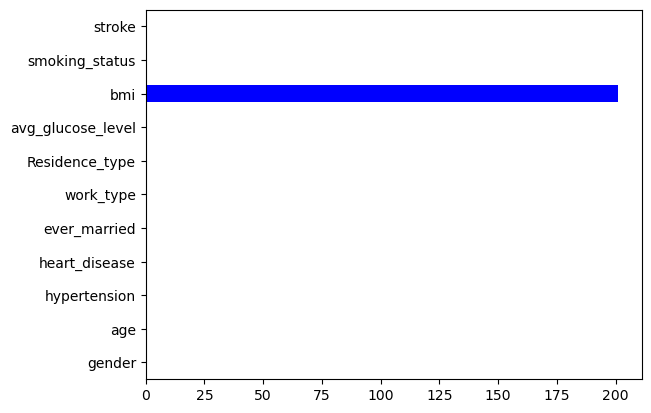

In [112]:
df1.isna().sum().plot.barh(color='blue')

*There are 201 missing values in bmi column.*

**Checking how many percentage of missing values present**

In [113]:
missing_percentage = 100.0*missing_values/df1.shape[0]
missing_percentage

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [114]:
missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
print(missing_data)

                   Missing Values  Percentage
gender                          0    0.000000
age                             0    0.000000
hypertension                    0    0.000000
heart_disease                   0    0.000000
ever_married                    0    0.000000
work_type                       0    0.000000
Residence_type                  0    0.000000
avg_glucose_level               0    0.000000
bmi                           201    3.933464
smoking_status                  0    0.000000
stroke                          0    0.000000


In [115]:
df1[df1['bmi'].isna()==True]['stroke'].value_counts()

0    161
1     40
Name: stroke, dtype: int64

*There are 3.94 % missing values present in our data set, in which 40 of them having chance of Stroke so we can't drop this.*

We will fill these values, to fill these values we can use mean imputation also but we will fill by using knn imputation.

**KNN Imputer** 
- www.scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer

In [116]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [117]:
columns_with_missing = ['bmi']

# Filling missing values using KNN imputation
df1['bmi'] = imputer.fit_transform(df1[columns_with_missing])

In [118]:
df1['bmi'].isna().sum()

0

In [119]:
df1.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

*Now there are no missing values.*

In [120]:
df1.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Univariate Analysis

In [121]:
for col in df1.select_dtypes(include=['object']):
    print(col,' --> ',df1[col].unique())

gender  -->  ['Male' 'Female' 'Other']
ever_married  -->  ['Yes' 'No']
work_type  -->  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type  -->  ['Urban' 'Rural']
smoking_status  -->  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [122]:
# Analyze the distribution of numeric variables
numeric_variables = df1.select_dtypes(include=['float64', 'int64'])
numeric_variables.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  5110.000000  5110.000000  
mean     28.893237     0.048728  
std       7.698018     0.215320  
min      10.300000     0.000000  
25%      23.800000     0.000000  
50%      28.400000     0.000000  
75%      32.800000     0.000000  
max      97.600000     1.000000

In [123]:
# Analyze the distribution of categorical variables
categorical_variables = df1.select_dtypes(include=['object'])
categorical_variables.describe()

gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892

### Bivariate Analysis

In [124]:
# Exploring relationship between target variable ('stroke') and other variables
df1.groupby('stroke').mean()  # Mean values for each variable by stroke category

age  hypertension  heart_disease  avg_glucose_level        bmi
stroke                                                                      
0       41.971545      0.088871       0.047110         104.795513  28.825388
1       67.728193      0.265060       0.188755         132.544739  30.217789

In [125]:
numeric_feature = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_feature = [feature for feature in df1.columns if df1[feature].dtype == 'O']

print(f"we have {len(numeric_feature)} numeric features",numeric_feature)
print(f"we have {len(categorical_feature)} categorical features",categorical_feature)

we have 6 numeric features ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
we have 5 categorical features ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


**Check Duplicates**

In [126]:
df1.duplicated().sum()

0

*There are no duplicates present in dataset*

In [127]:
# df1.nunique()

### Outlier Detection

In [128]:
df1.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0          Urban             228.69  36.600000  formerly smoked       1  
1          Rural             202.21  28.893237     never smoked       1  
2          Rural             105.92  32.500000     never smoked       1  
3          Urban             171.23  34.400000           smokes       1  
4          Rural             174.12  24.000000     never smoked       1

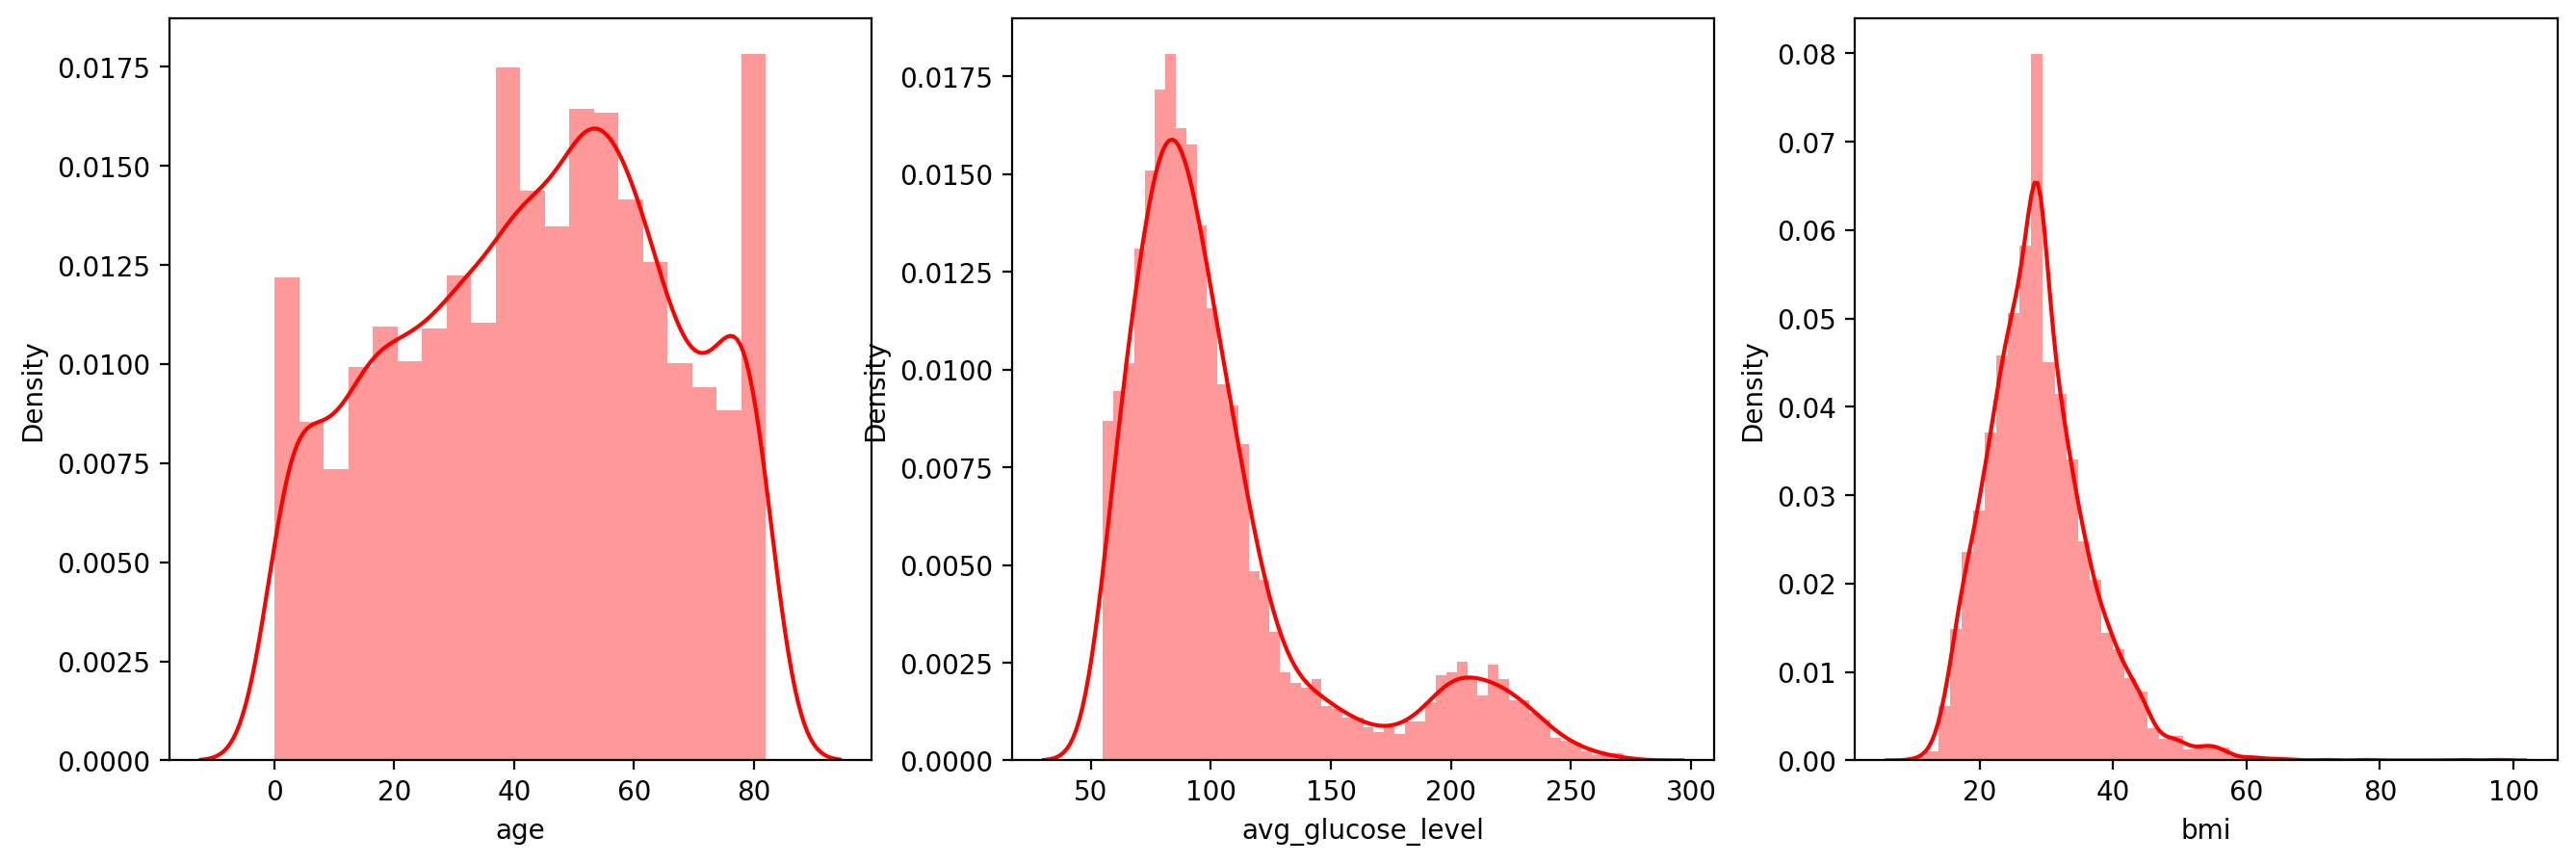

In [129]:
i = 1
plt.figure(figsize=(16,5),dpi=200)
for col in df1.select_dtypes(include=['float64']):
    plt.subplot(1,3,i)
    sns.distplot(df1[col],color='r')
    i = i+1

*Not Normally distributed* (age is somthing like normal ditributed)

In [130]:
print(df1['age'].skew())
print(df1['avg_glucose_level'].skew())
print(df1['bmi'].skew())

-0.1370593225984694
1.5722838665030459
1.0767160713842094


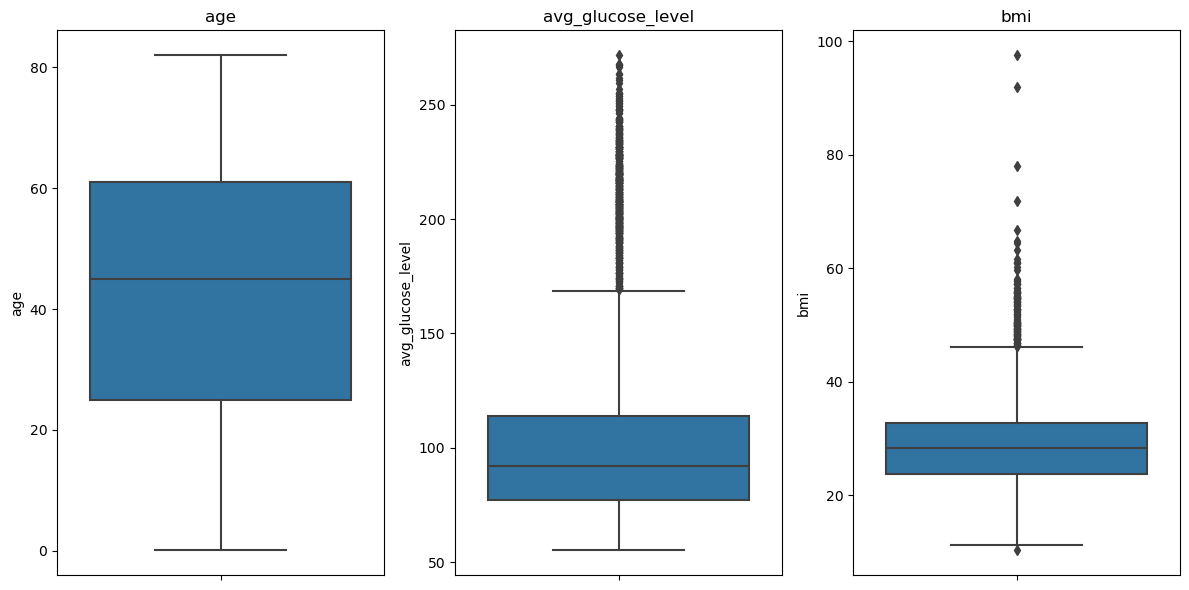

In [131]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df1[col])
    plt.title(col)
plt.tight_layout()
plt.show()


**age column** *don't have an outlier*

**avg_glucose_level column**

In [132]:
Q1 = df1['avg_glucose_level'].quantile(0.25)
Q3 = df1['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

df1[(df1['avg_glucose_level'] < (Q1 - 1.5*IQR)) | (df1['avg_glucose_level'] > (Q3 + 1.5*IQR))]['stroke'].value_counts()

0    543
1     84
Name: stroke, dtype: int64

*We are not going to removing these becouse if we remove then we can lose important information since there could be possible that becouse of these there are having stroke as we can see 84 values are belonging to 1 class.*

**bmi column**

In [133]:
Q1_2 = df1['bmi'].quantile(0.25)
Q3_2 = df1['bmi'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2

df1[(df1['bmi'] < (Q1_2 - 1.5*IQR_2)) | (df1['bmi'] > (Q3_2 + 1.5*IQR_2))]['stroke'].value_counts()

0    123
1      3
Name: stroke, dtype: int64

In [134]:
bmi_outlier = df1[(df1['bmi'] < (Q1_2 - 1.5*IQR_2)) | (df1['bmi'] > (Q3_2 + 1.5*IQR_2))]

bmi_outlier[bmi_outlier['stroke'] != 0]

gender   age  hypertension  heart_disease ever_married      work_type  \
21   Female  52.0             1              0          Yes  Self-employed   
66   Female  70.0             0              0          Yes        Private   
113  Female  45.0             0              0          Yes        Private   

    Residence_type  avg_glucose_level   bmi smoking_status  stroke  
21           Urban             233.29  48.9   never smoked       1  
66           Urban             221.58  47.5   never smoked       1  
113          Rural             224.10  56.6   never smoked       1

*We can conclude that high bmi(extreme outliers) is not causes stroke so we can remove that.*

In [135]:
outliers = bmi_outlier[bmi_outlier['stroke'] == 0]['bmi']>65
outliers

254     False
258     False
270     False
333     False
341     False
        ...  
4906    False
4952    False
5009    False
5057    False
5103    False
Name: bmi, Length: 123, dtype: bool

In [136]:
df = df1.drop(df1[df1['bmi']>65].index)

In [137]:
df['stroke'].value_counts()

0    4856
1     249
Name: stroke, dtype: int64

*We have dropped the outliers of BMI column without affecting positive stroke class.*

**BMI More info - https://en.wikipedia.org/wiki/Body_mass_index**

### Check dataset balanced or not

In [138]:
stroke_count = df['stroke'].value_counts()
stroke_count

0    4856
1     249
Name: stroke, dtype: int64

In [139]:
print(f"{round(100.0*stroke_count.iloc[1]/df.shape[0],2)} percentage data belongs to positive(1) class.")
print(f"{round(100.0*stroke_count.iloc[0]/df.shape[0],2)} percentage data belongs to negative(0) class.")

4.88 percentage data belongs to positive(1) class.
95.12 percentage data belongs to negative(0) class.


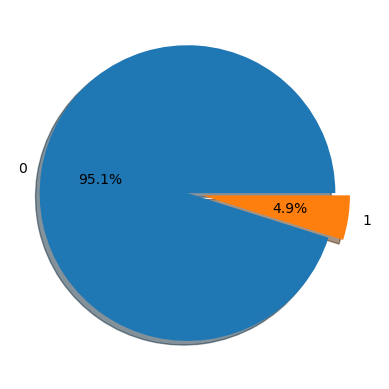

In [140]:
plt.pie(df["stroke"].value_counts(), labels=[0,1], shadow=True, explode=(0.05,0.05), autopct="%1.1f%%");

*Clearly dataset is not balanced as there is almost only 4.9% data belongs to the positive class.*

#### *we have a various techniques to handle imbalanced dataset such as under_sampler,oversampler(randomoversampler),SMOTETomek,Ensemble techniques(bagging or boosting) etc but we are starting with first and moving ahead and not seeing only the accuracy score instead we focus on recall, precesion, F1_score, confusion matrix etc and based on our requirement from dataset we choose a correct sampler.(NOTE - under sampler is not perform well when have a large dataset(eg. if data set have 200000 rows) it can be good for small datasets only(maxtime) we handle this when we are performing  model training.*

### Visualizations

**Age Feature Analysis**

<AxesSubplot:xlabel='age', ylabel='Density'>

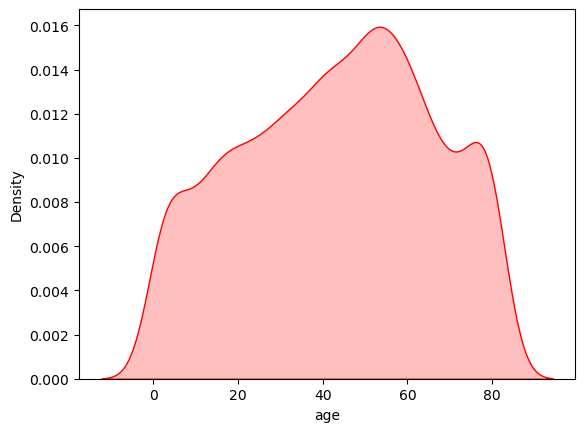

In [141]:
sns.kdeplot(df['age'],shade=True,color='red')

Text(0.5, 1.0, 'Age Distribution')

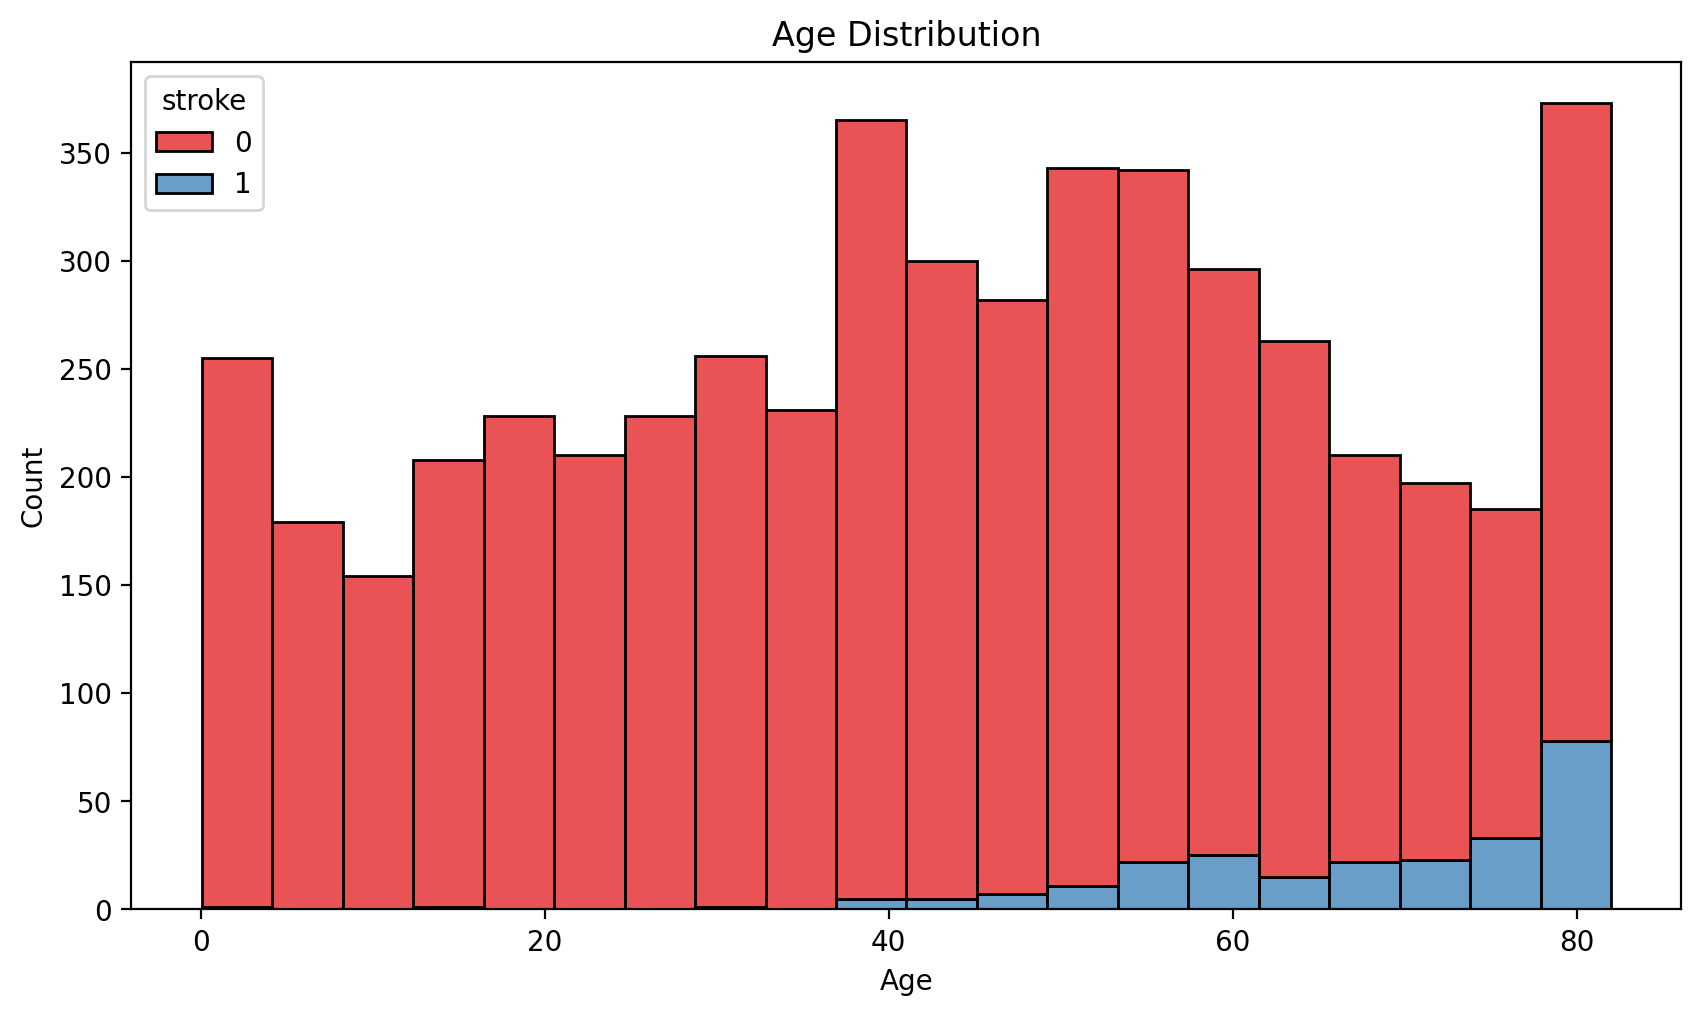

In [142]:
plt.figure(figsize=(10,5.5),dpi=200)
sns.histplot(data = df,x='age',hue='stroke',multiple='stack',palette='Set1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

**Insights**
   
   - *40-60 age group has high frequency in dataset,this age group contains maximum number of peoples*
   - *Older age causes more chances to getting Brain Stroke.*

In [143]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list, default: None
        A sequence of strings providing the labels for each wedge
    
    colors : array-like, default: None
        A sequence of colors through which the pie chart will 

**Gender Feature Analysis**

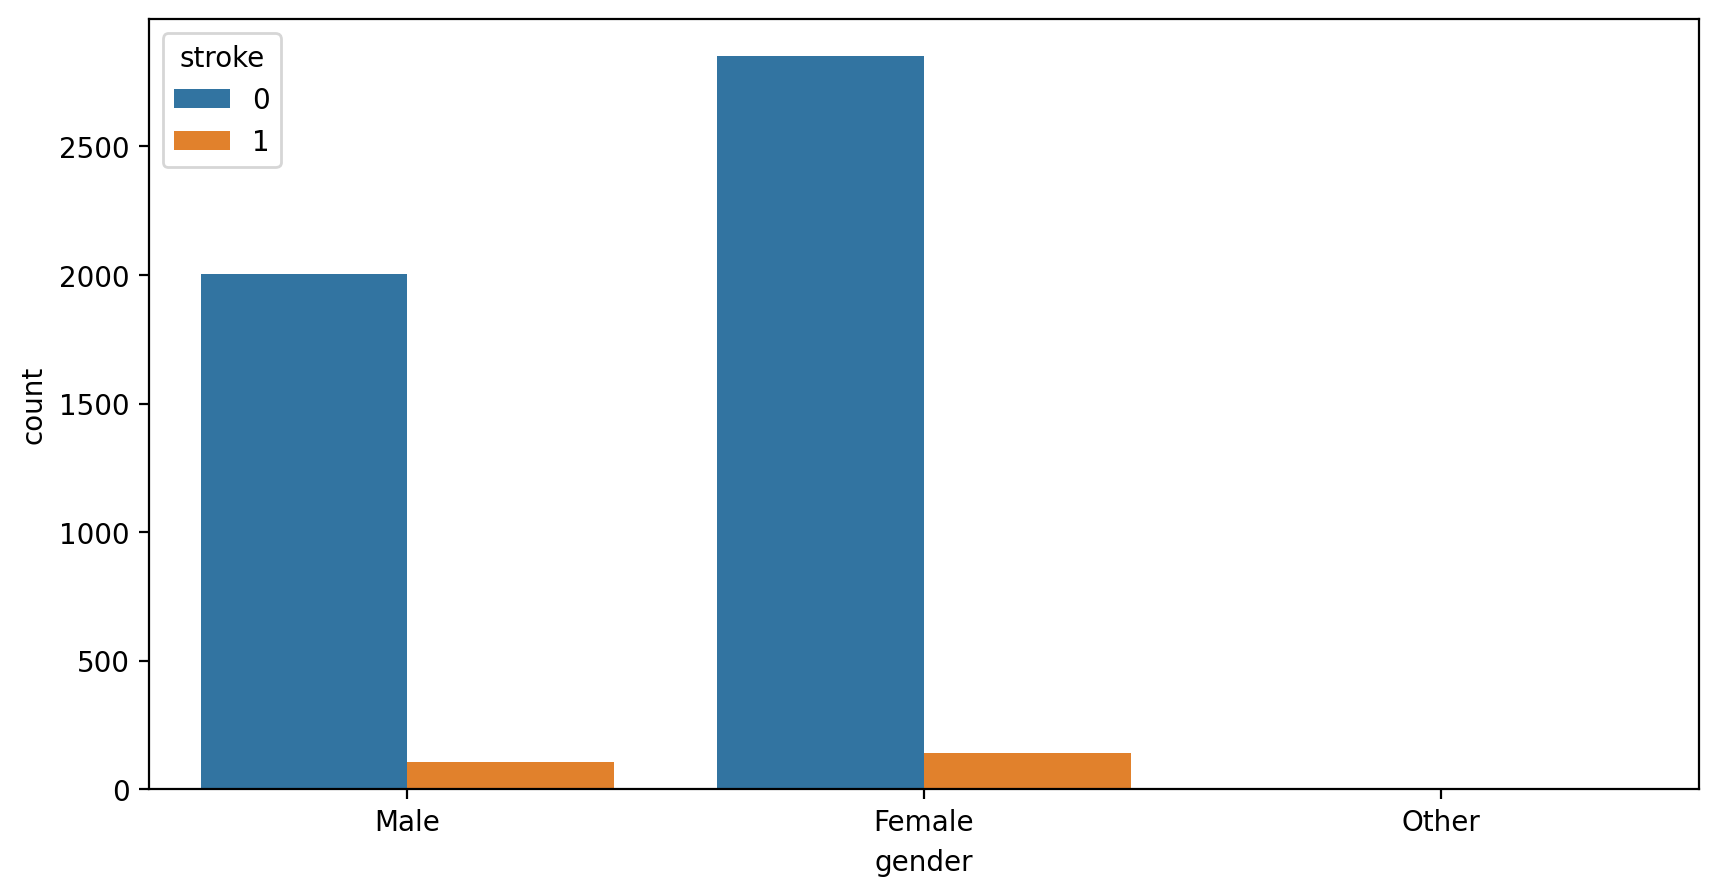

In [144]:
plt.figure(figsize= (10,5),dpi=200)
sns.countplot(data=df,x='gender',hue='stroke');

*It's better to drop other from gender.*

In [145]:
df = df.drop(df[df['gender']=='Other'].index)

In [146]:
df.shape

(5104, 11)

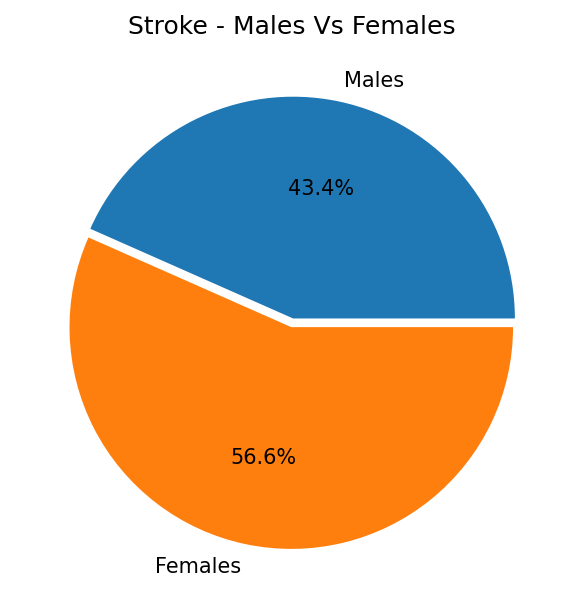

In [147]:
plt.figure(dpi=150)
M = df[df['gender']=='Male']['stroke'].value_counts()[1]
F = df[df['gender']=='Female']['stroke'].value_counts()[1]
plt.pie(x=[M,F], labels=['Males','Females'], explode=[0.02, 0.02], autopct='%.1f%%')
plt.title('Stroke - Males Vs Females');
# aitopct is used to show values correct to n decimal places(eg. .1f mns correct to 1 place)

**Insights**
    
   - *We can see as compare to males, females are having more chance of getting stroke*
   - *In chance of getting stroke 56.6% are females while 43.4% are males.*
   
  **NOTE** - In dataset also number of females is more then males.

**Hypertension Feature Analysis**

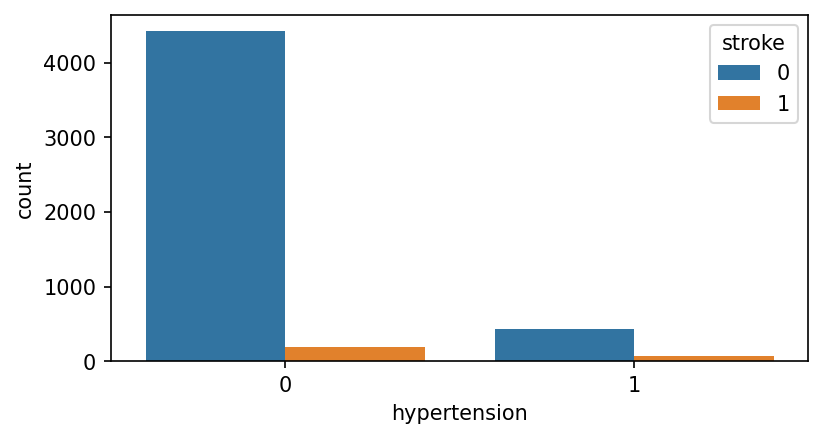

In [148]:
plt.figure(figsize= (6,3),dpi=150)
sns.countplot(data=df,x='hypertension',hue='stroke');

**Insight**
    
   - *Majority of numbers doesn't have hypertansion.*
   - *In Stroke view percentage wise those are more likely to getting stroke who are having hypertension.*

**Heart Disease Analysis**

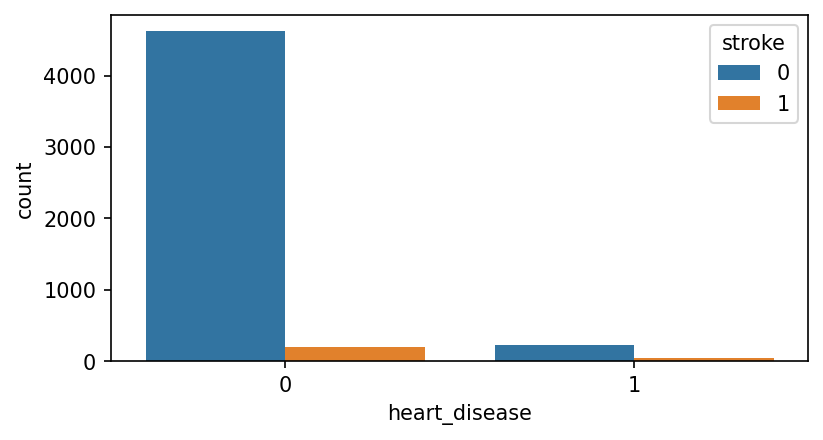

In [149]:
plt.figure(figsize= (6,3),dpi=150)
sns.countplot(data=df,x='heart_disease',hue='stroke');

**Insight**
    
   - *Majority of numbers doesn't have heart disease.*
   - *In Stroke view and percentage wise those are more likely to getting stroke who have heart disease.*

**Work_type Feature Analysis**

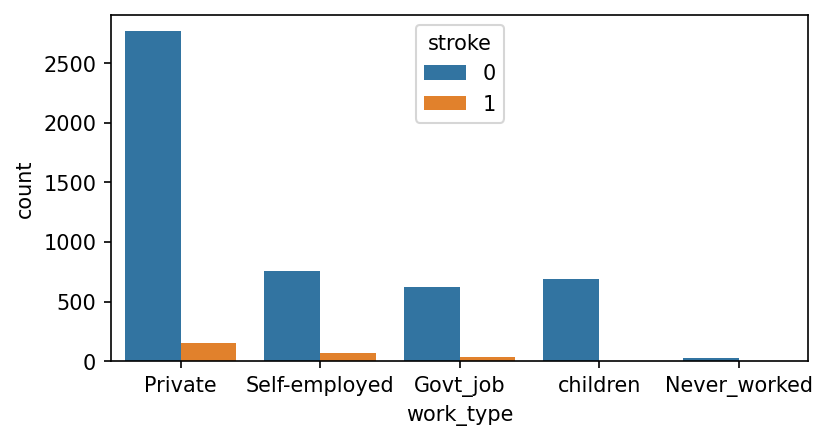

In [150]:
plt.figure(figsize= (6,3),dpi=150)
sns.countplot(data=df,x='work_type',hue='stroke');

In [151]:
# plt.figure(dpi=150)
# W0 = df[df['work_type']=='Private']['stroke'].value_counts()[1]
# W1 = df[df['work_type']=='Self-employed']['stroke'].value_counts()[1]
# W2 = df[df['work_type']=='Govt_job']['stroke'].value_counts()[1]
# W3 = df[df['work_type']=='child labur']['stroke'].value_counts()[1]
# # W4 = df[df['work_type']=='Never_worked']['stroke'].value_counts()[1]
# keys = ['Private','Self-employed','Govt_job','children']
# plt.pie(x=[W0,W1,W2,W3], labels=keys, explode=[0.01, 0,0,0], autopct='%.1f%%')
# plt.title('Stroke Vs Work_type');

**Insight**
    
   - *We can see that who are having work type Private they are more likely to getting Stroke, after that those who are self employed.*

**Residence_type Feature Analysis**

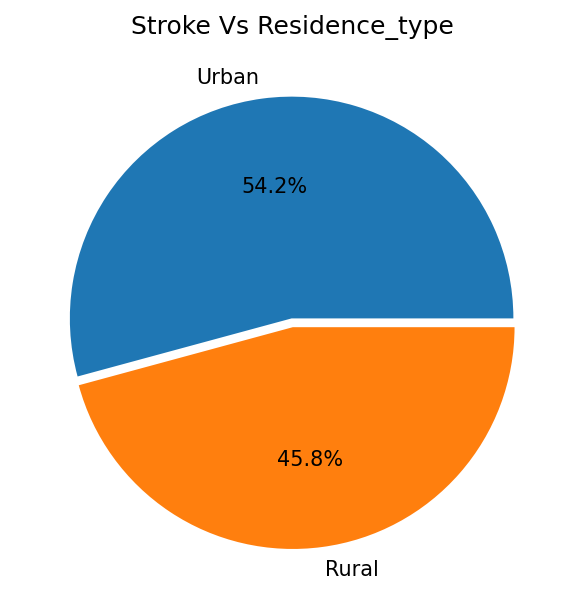

In [152]:
plt.figure(dpi=150)
U = df[df['Residence_type']=='Urban']['stroke'].value_counts()[1]
R = df[df['Residence_type']=='Rural']['stroke'].value_counts()[1]
plt.pie(x=[U,R], labels=['Urban','Rural'], explode=[0.02, 0.02], autopct='%.1f%%')
plt.title('Stroke Vs Residence_type');

**Insight**
    
   - *We can see those who are living in Urban area they have more chance of getting Stroke.*

**Smoking_status Feature Analysis**

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

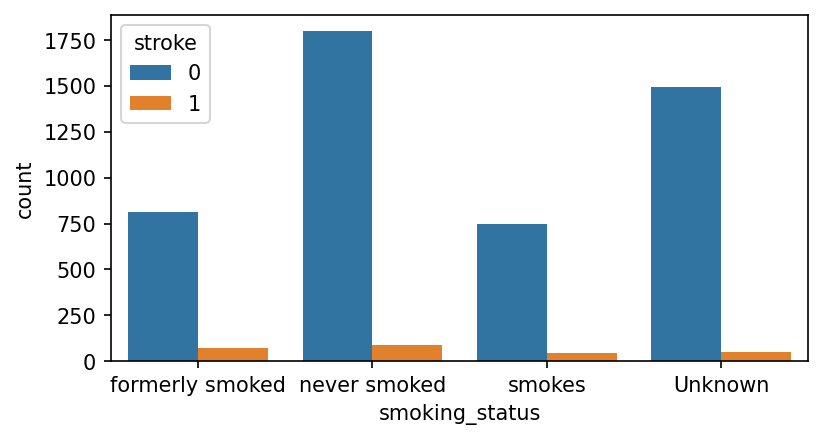

In [153]:
plt.figure(figsize= (6,3),dpi=150)
sns.countplot(data=df,x='smoking_status',hue='stroke')

**Married Feature Analysis**

<AxesSubplot:xlabel='stroke', ylabel='count'>

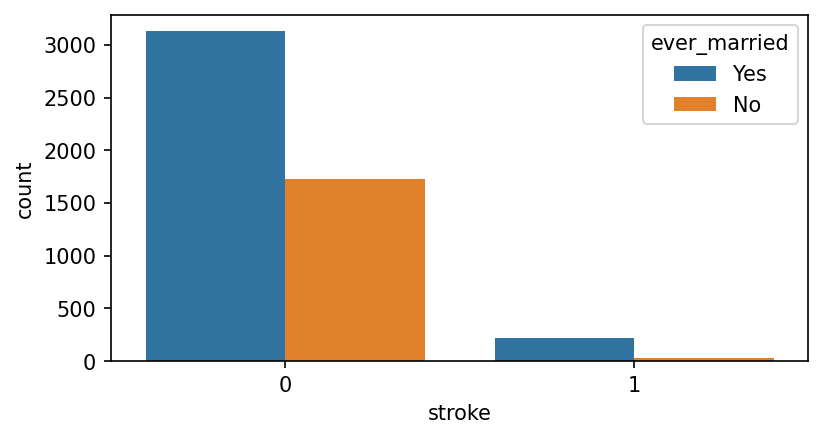

In [154]:
plt.figure(figsize= (6,3),dpi=150)
sns.countplot( data=df, x='stroke', hue='ever_married')

**Avg_glucose_level Feature Analysis**

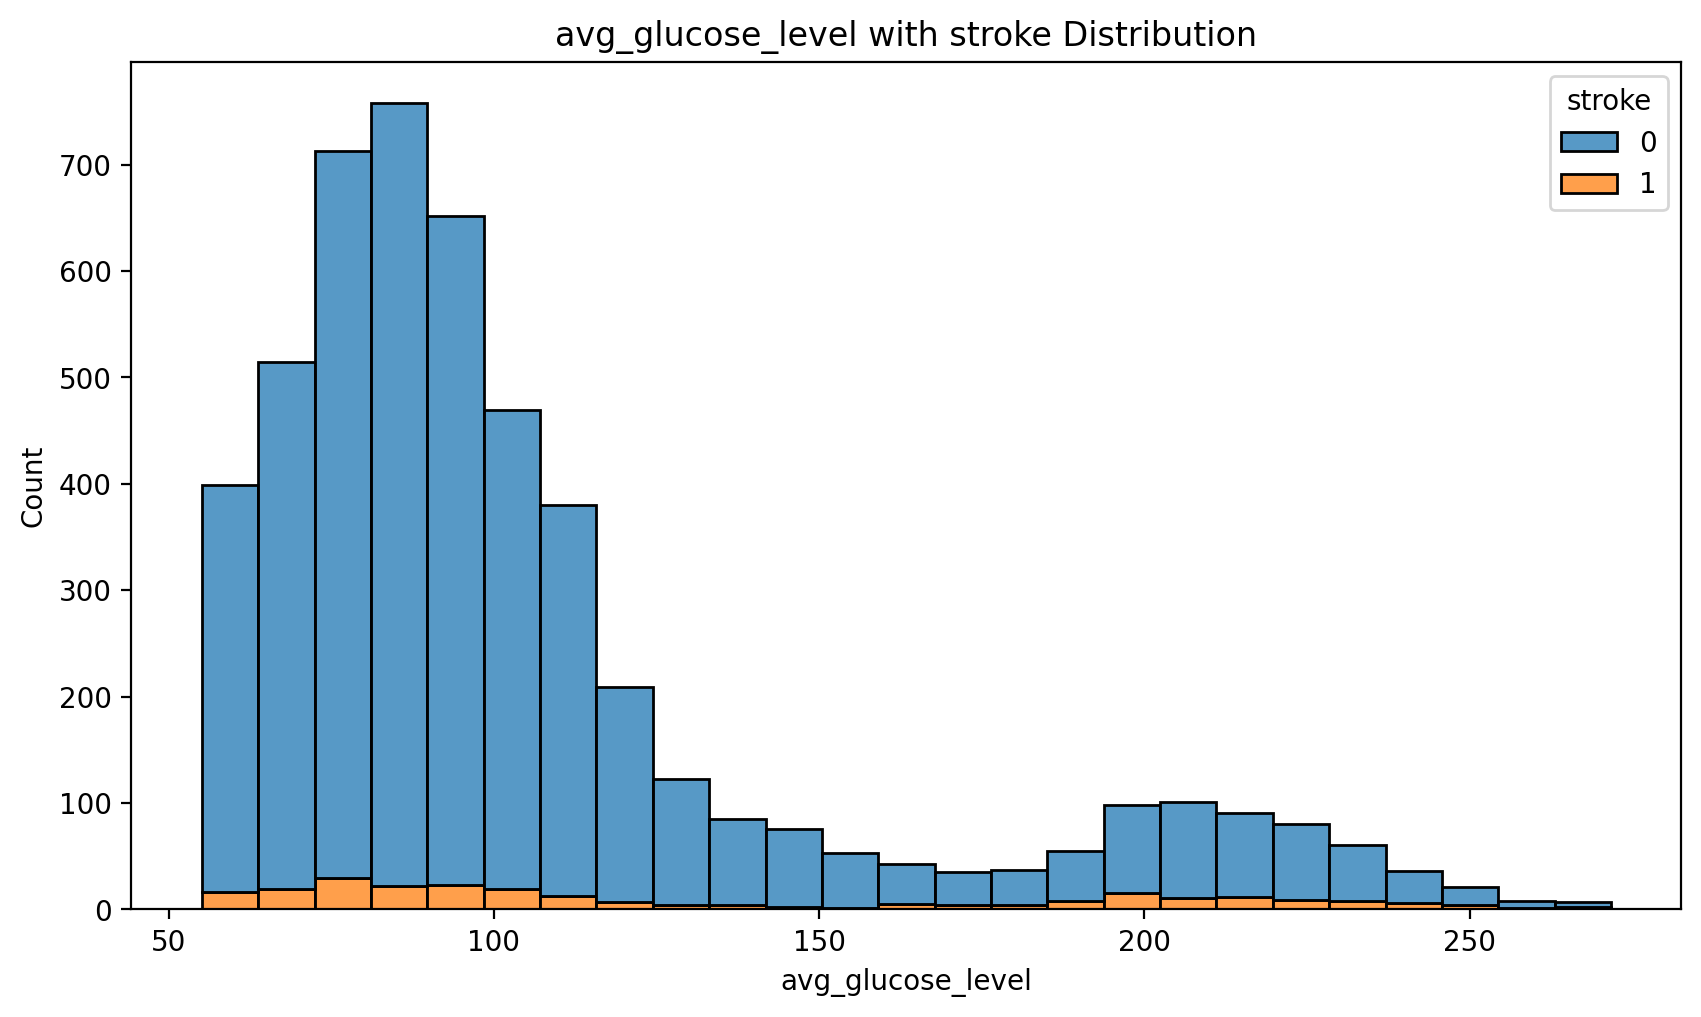

In [155]:
plt.figure(figsize=(10,5.5),dpi=200)
sns.histplot(data = df,x='avg_glucose_level',hue='stroke',multiple='stack',bins=25)
plt.xlabel('avg_glucose_level')
plt.ylabel('Count')
plt.title('avg_glucose_level with stroke Distribution');

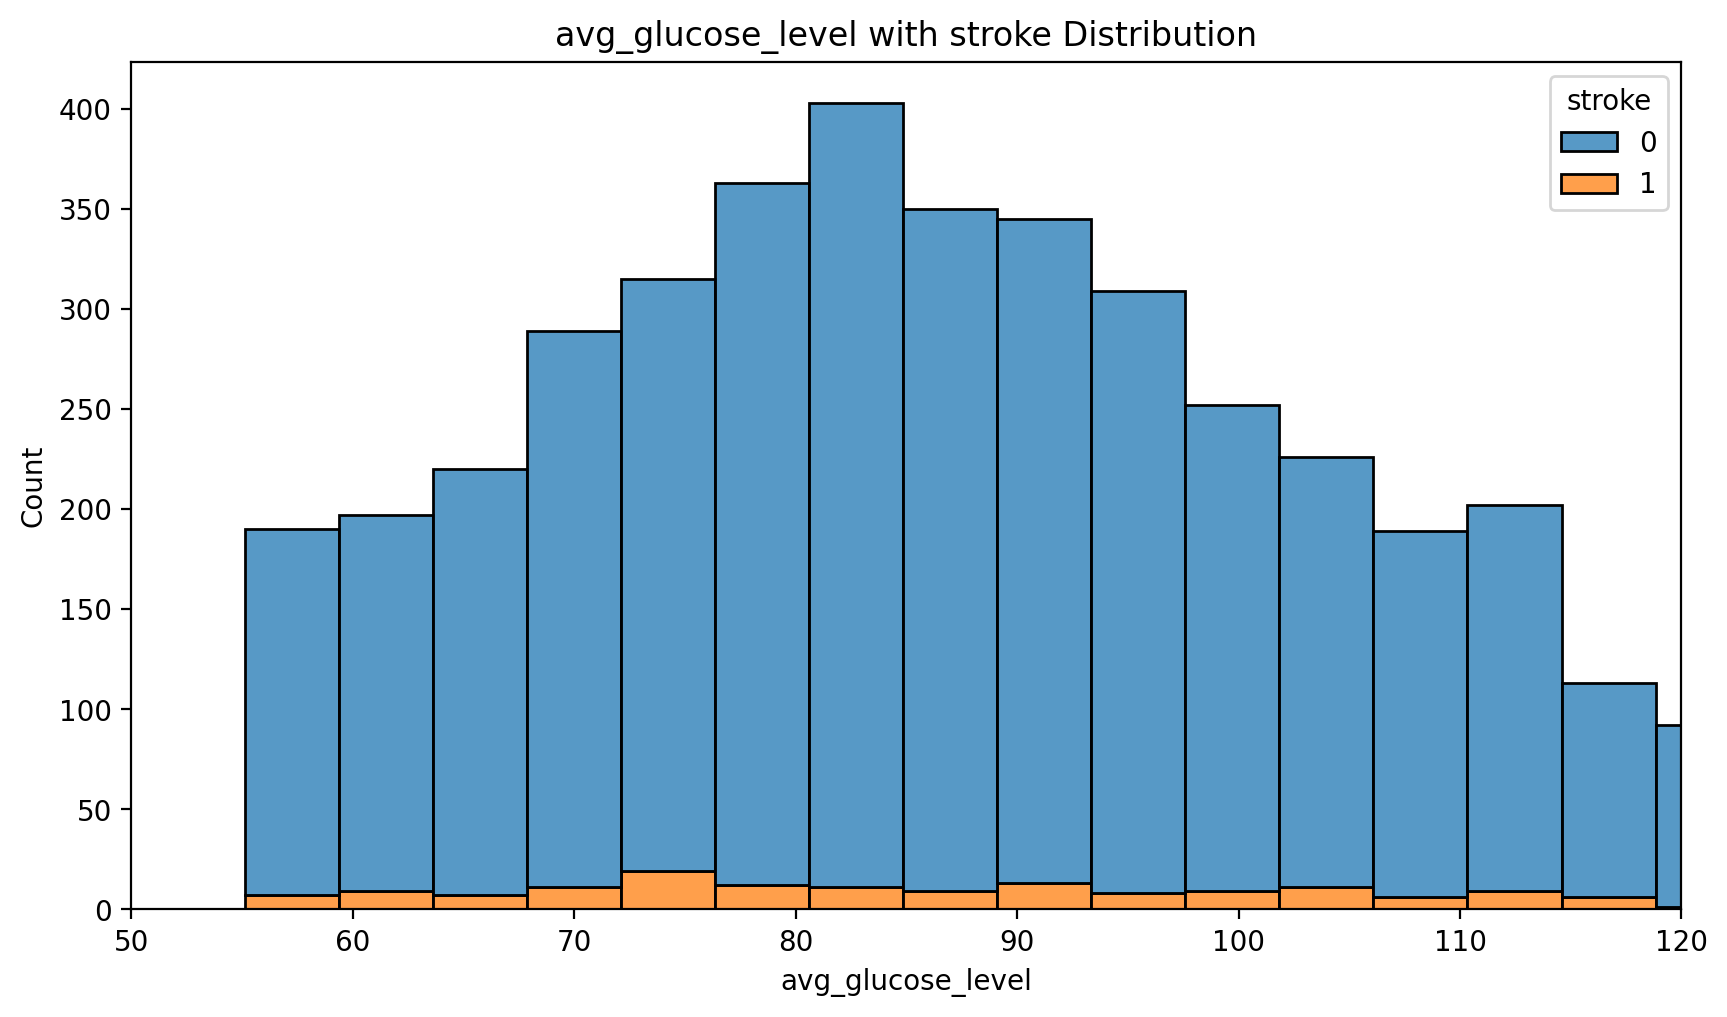

In [156]:
plt.figure(figsize=(10,5.5),dpi=200)
sns.histplot(data = df,x='avg_glucose_level',hue='stroke',multiple='stack')
plt.xlabel('avg_glucose_level')
plt.ylabel('Count')
plt.xlim(50,120)
plt.title('avg_glucose_level with stroke Distribution');

**By WHO -
    The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L).**
    
**Insight**
    
   - *We can see most of them have balanced glucose level.*
   - *Those are more likely to get stroke, they have avg_glucose_level between 70 to 80.*

**Combined Feature Analysis**

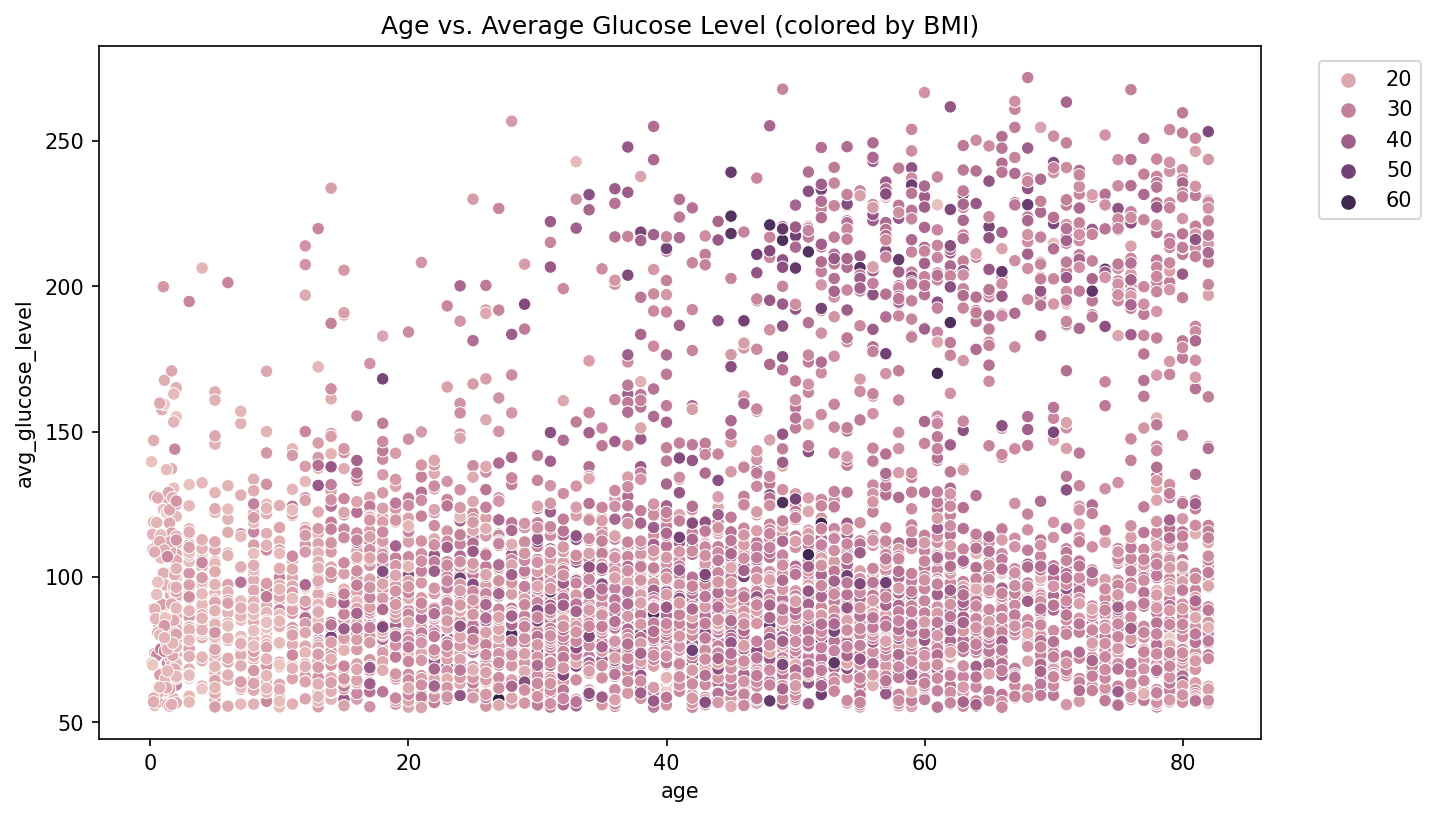

In [157]:
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(data=df, x="age", y="avg_glucose_level", hue="bmi")
plt.title("Age vs. Average Glucose Level (colored by BMI)")
plt.legend(loc=(1.05,0.75))

**Insight**

   - *As age is increasing then avg_glucose_level is slightly going to increase.*
   - *bmi is also positively correlated with age and avg_glucose_level*

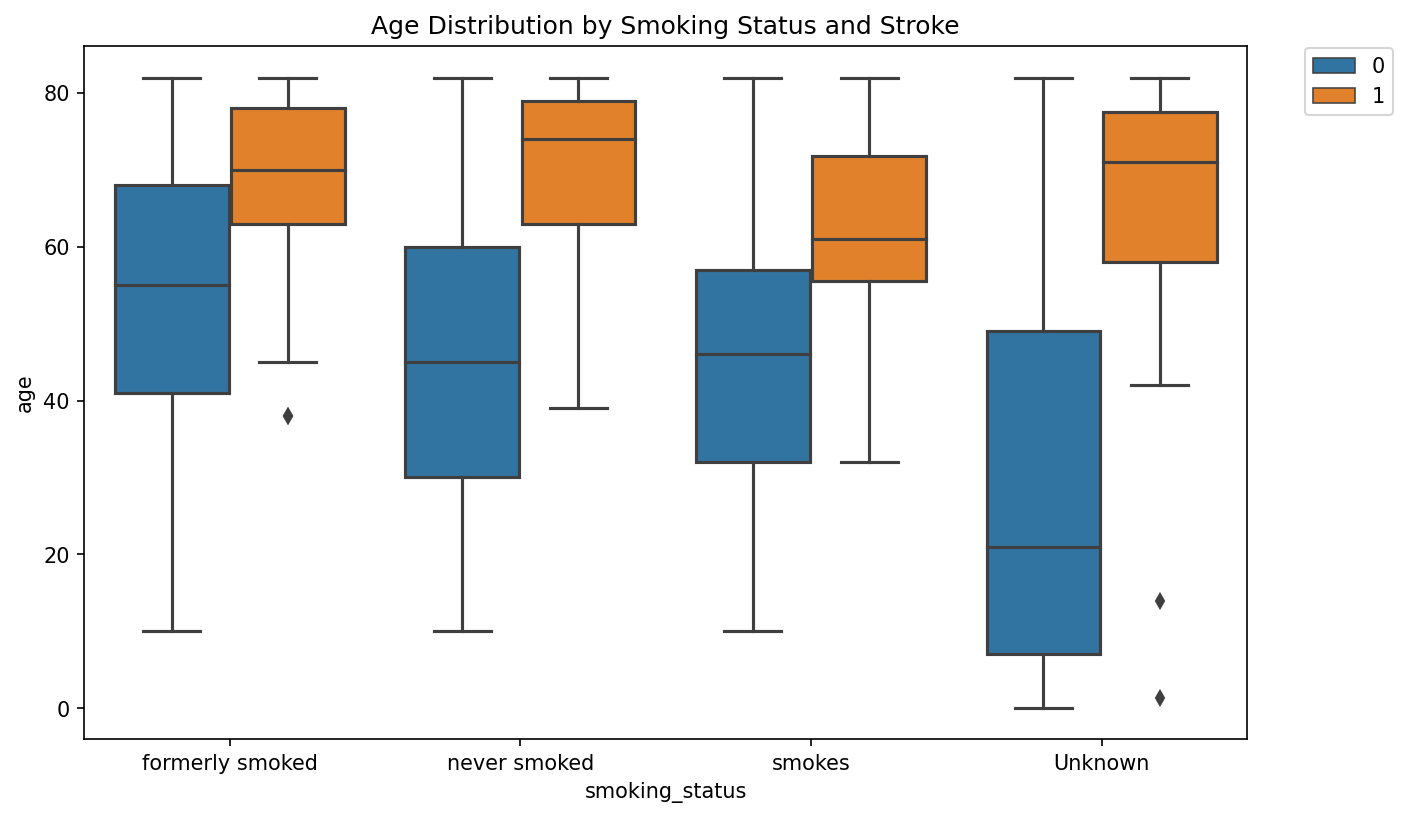

In [158]:
plt.figure(figsize=(10,6),dpi=150)
sns.boxplot(data=df, x="smoking_status", y="age", hue="stroke")
plt.title("Age Distribution by Smoking Status and Stroke")
plt.legend(loc=(1.05,0.9));

**Insights**
    
   - *Almost 75% of them who belongs to positive class are older then 55 year.*
   - *In all of them who does not have a chance to get Stroke they are not older then age 70.* 
   - *In this we can see that age distribution is almost same for never_smoked and smoked smoking status for them who havnn't chance to get Stroke(0).*
   - *Age distribution is almost same for them who are either never_smoked or formerly smoked and has chance to get Stroke,but the mean is slightly different.*
   

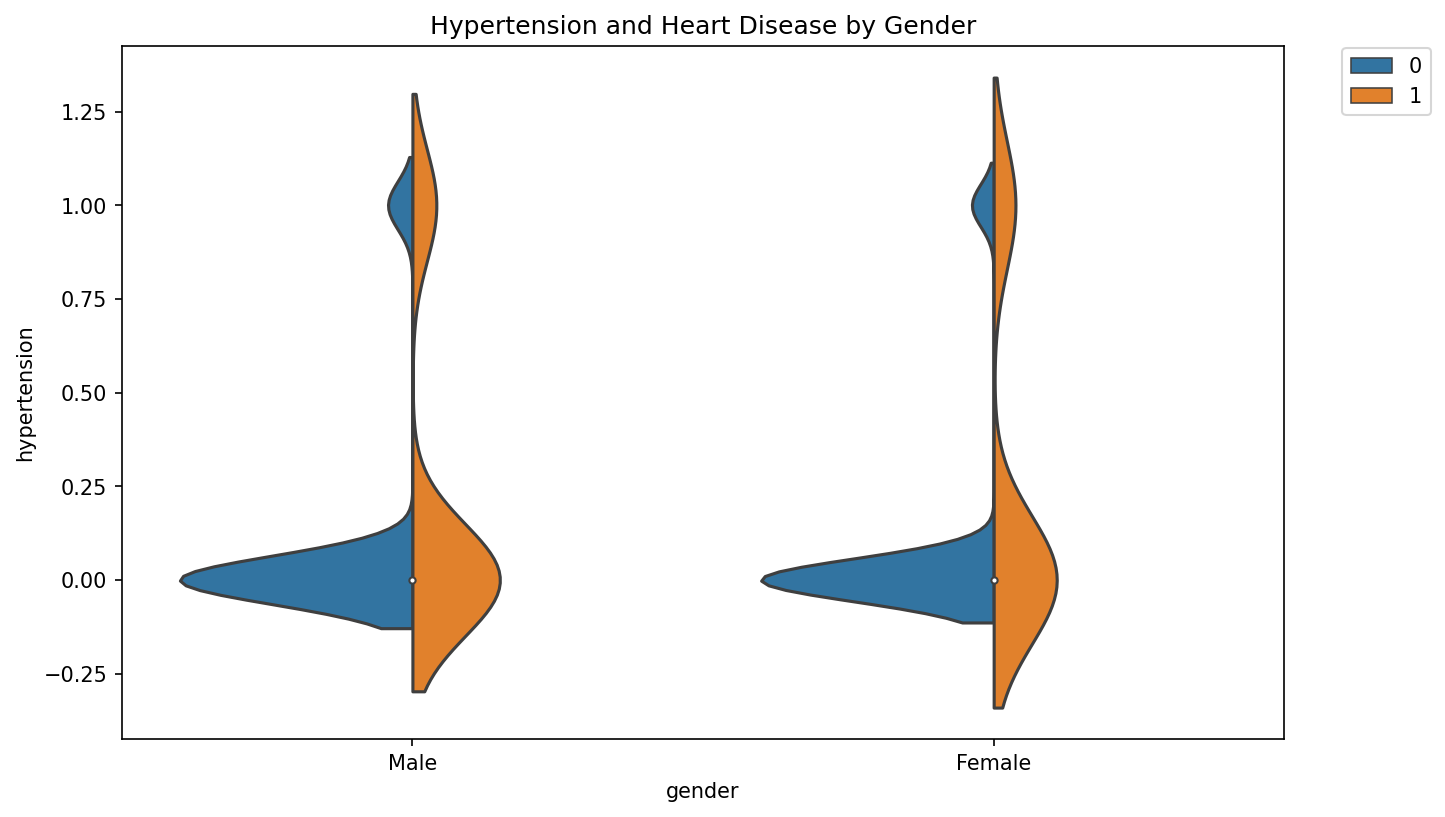

In [159]:
plt.figure(figsize=(10,6),dpi=150)
sns.violinplot(data=df, x="gender", y="hypertension", hue="heart_disease", split=True)
plt.title("Hypertension and Heart Disease by Gender")
plt.legend(loc=(1.05,0.9));

**Insight**

<Figure size 2400x1600 with 0 Axes>

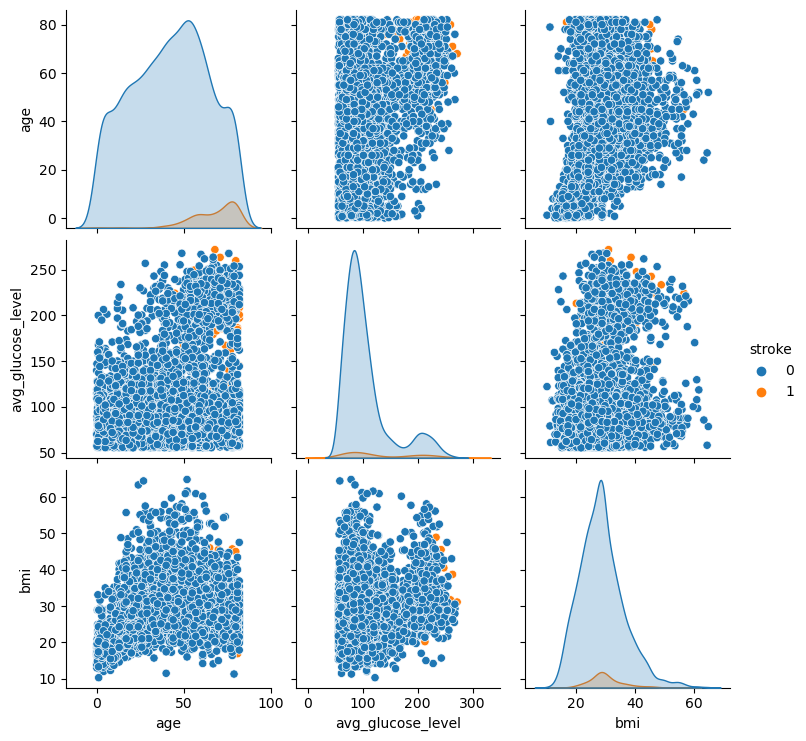

In [160]:
plt.figure(figsize=(12,8),dpi=200)
numerical_col_pair = df.select_dtypes(include=['float'])
numerical_col_pair['stroke'] = df['stroke']
sns.pairplot(numerical_col_pair,hue='stroke')


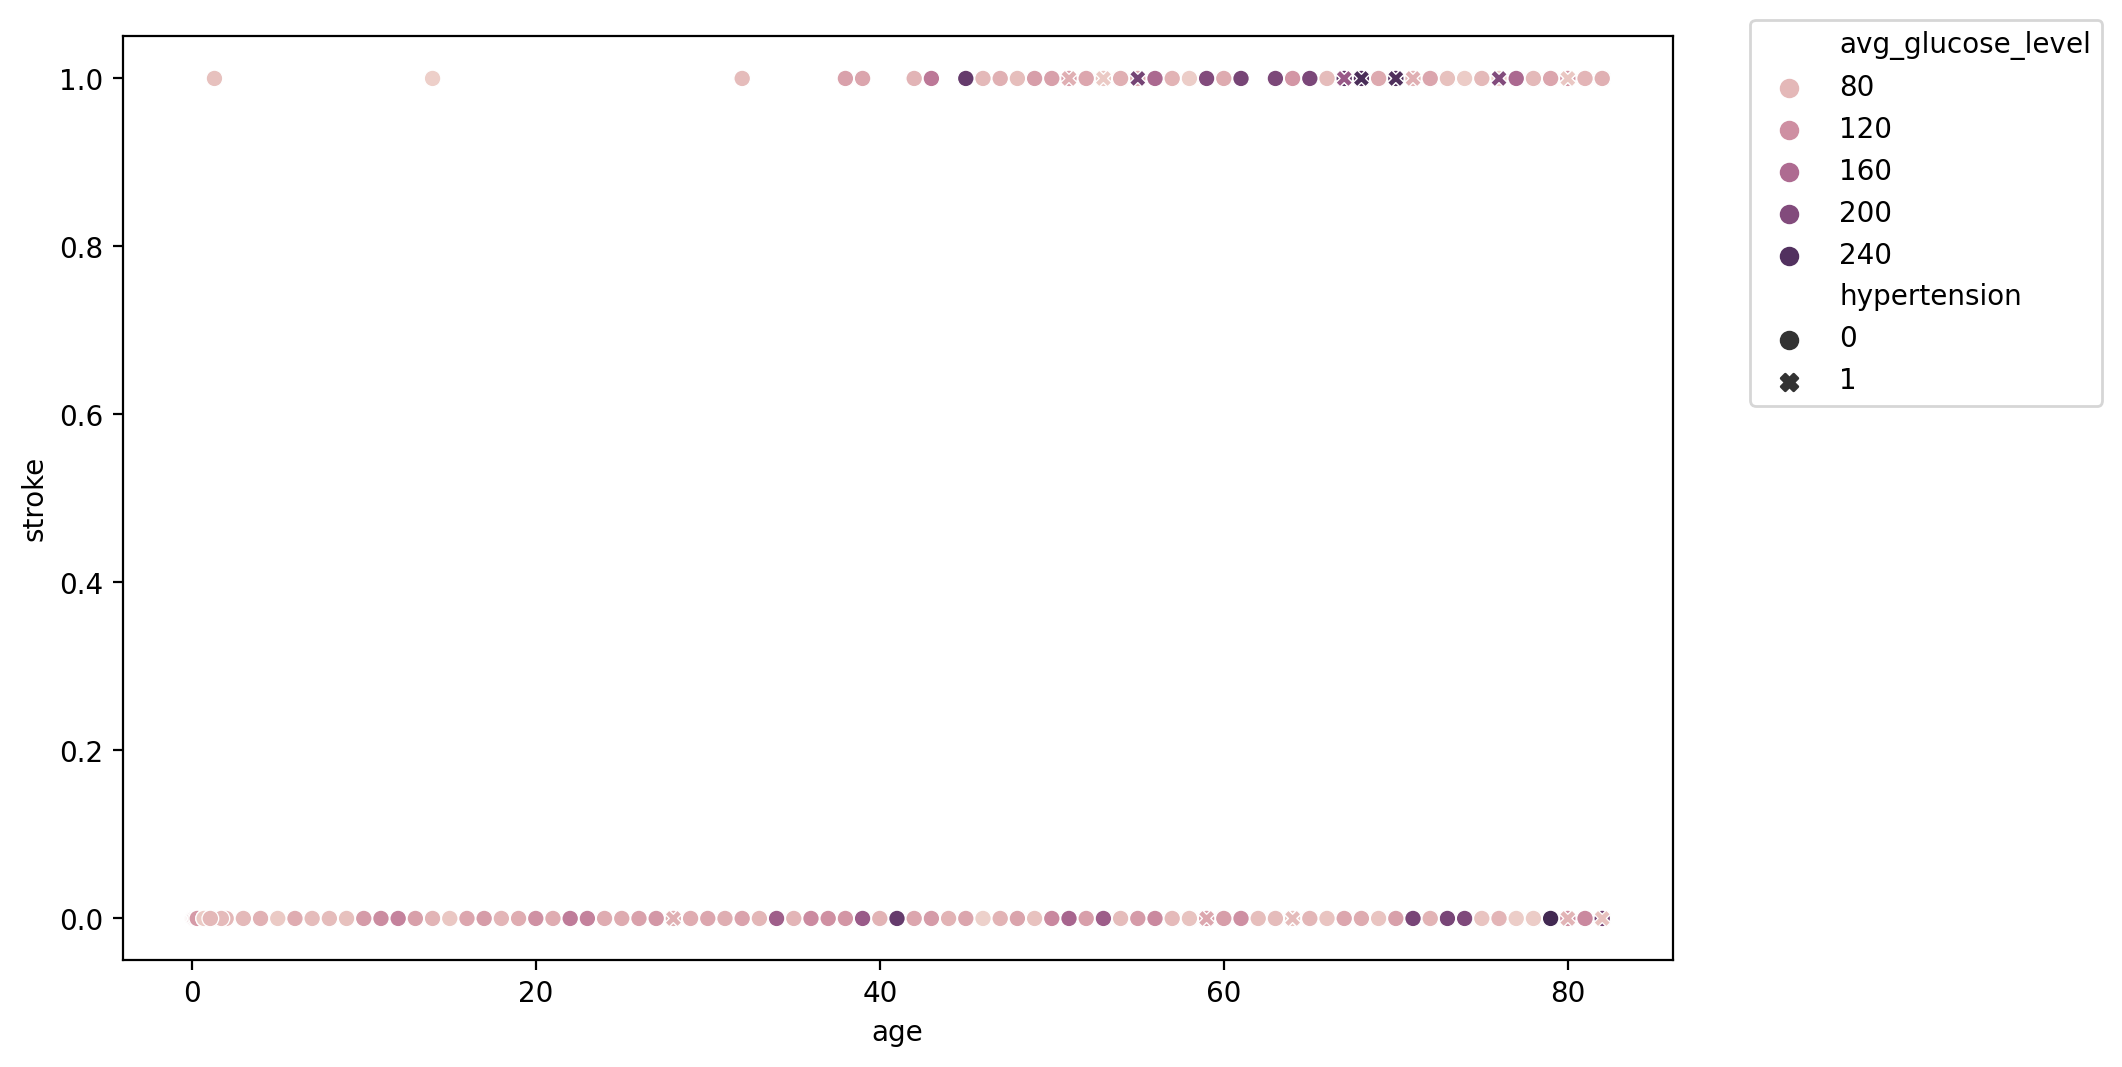

In [161]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='age',y='stroke',hue='avg_glucose_level',style='hypertension')
plt.legend(loc=(1.05,0.6));

**Insight**
    
   - *With increase in age and avg_glucose_level together hypertension(=1) there is also more chance of having Stroke.*

### Feature Engineering

Converting categorical into numerical columns.

In [162]:
df = pd.get_dummies(df,drop_first=True)
df.head()

# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(drop='first')
# enc.fit_transform(df)

age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0  67.0             0              1             228.69  36.600000       1   
1  61.0             0              0             202.21  28.893237       1   
2  80.0             0              1             105.92  32.500000       1   
3  49.0             0              0             171.23  34.400000       1   
4  79.0             1              0             174.12  24.000000       1   

   gender_Male  ever_married_Yes  work_type_Never_worked  work_type_Private  \
0            1                 1                       0                  1   
1            0                 1                       0                  0   
2            1                 1                       0                  1   
3            0                 1                       0                  1   
4            0                 1                       0                  0   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                        0                   0                     1   
1                        1                   0                     0   
2                        0                   0                     0   
3                        0                   0                     1   
4                        1                   0                     0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
1                               0                            1   
2                               0                            1   
3                               0                            0   
4                               0                            1   

   smoking_status_smokes  
0                      0  
1                      0  
2                      0  
3                      1  
4                      0

In [163]:
df.head()

age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0  67.0             0              1             228.69  36.600000       1   
1  61.0             0              0             202.21  28.893237       1   
2  80.0             0              1             105.92  32.500000       1   
3  49.0             0              0             171.23  34.400000       1   
4  79.0             1              0             174.12  24.000000       1   

   gender_Male  ever_married_Yes  work_type_Never_worked  work_type_Private  \
0            1                 1                       0                  1   
1            0                 1                       0                  0   
2            1                 1                       0                  1   
3            0                 1                       0                  1   
4            0                 1                       0                  0   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                        0                   0                     1   
1                        1                   0                     0   
2                        0                   0                     0   
3                        0                   0                     1   
4                        1                   0                     0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
1                               0                            1   
2                               0                            1   
3                               0                            0   
4                               0                            1   

   smoking_status_smokes  
0                      0  
1                      0  
2                      0  
3                      1  
4                      0

### Correlation Analysis

In [164]:
corr_wth_stroke =pd.DataFrame(df.corr()['stroke'].sort_values())
corr_wth_stroke

stroke
work_type_children             -0.083984
work_type_Never_worked         -0.014900
smoking_status_never smoked    -0.004151
smoking_status_smokes           0.008954
gender_Male                     0.009170
work_type_Private               0.012124
Residence_type_Urban            0.015286
bmi                             0.041420
work_type_Self-employed         0.062061
smoking_status_formerly smoked  0.064590
ever_married_Yes                0.108333
hypertension                    0.128623
avg_glucose_level               0.132048
heart_disease                   0.134859
age                             0.245218
stroke                          1.000000

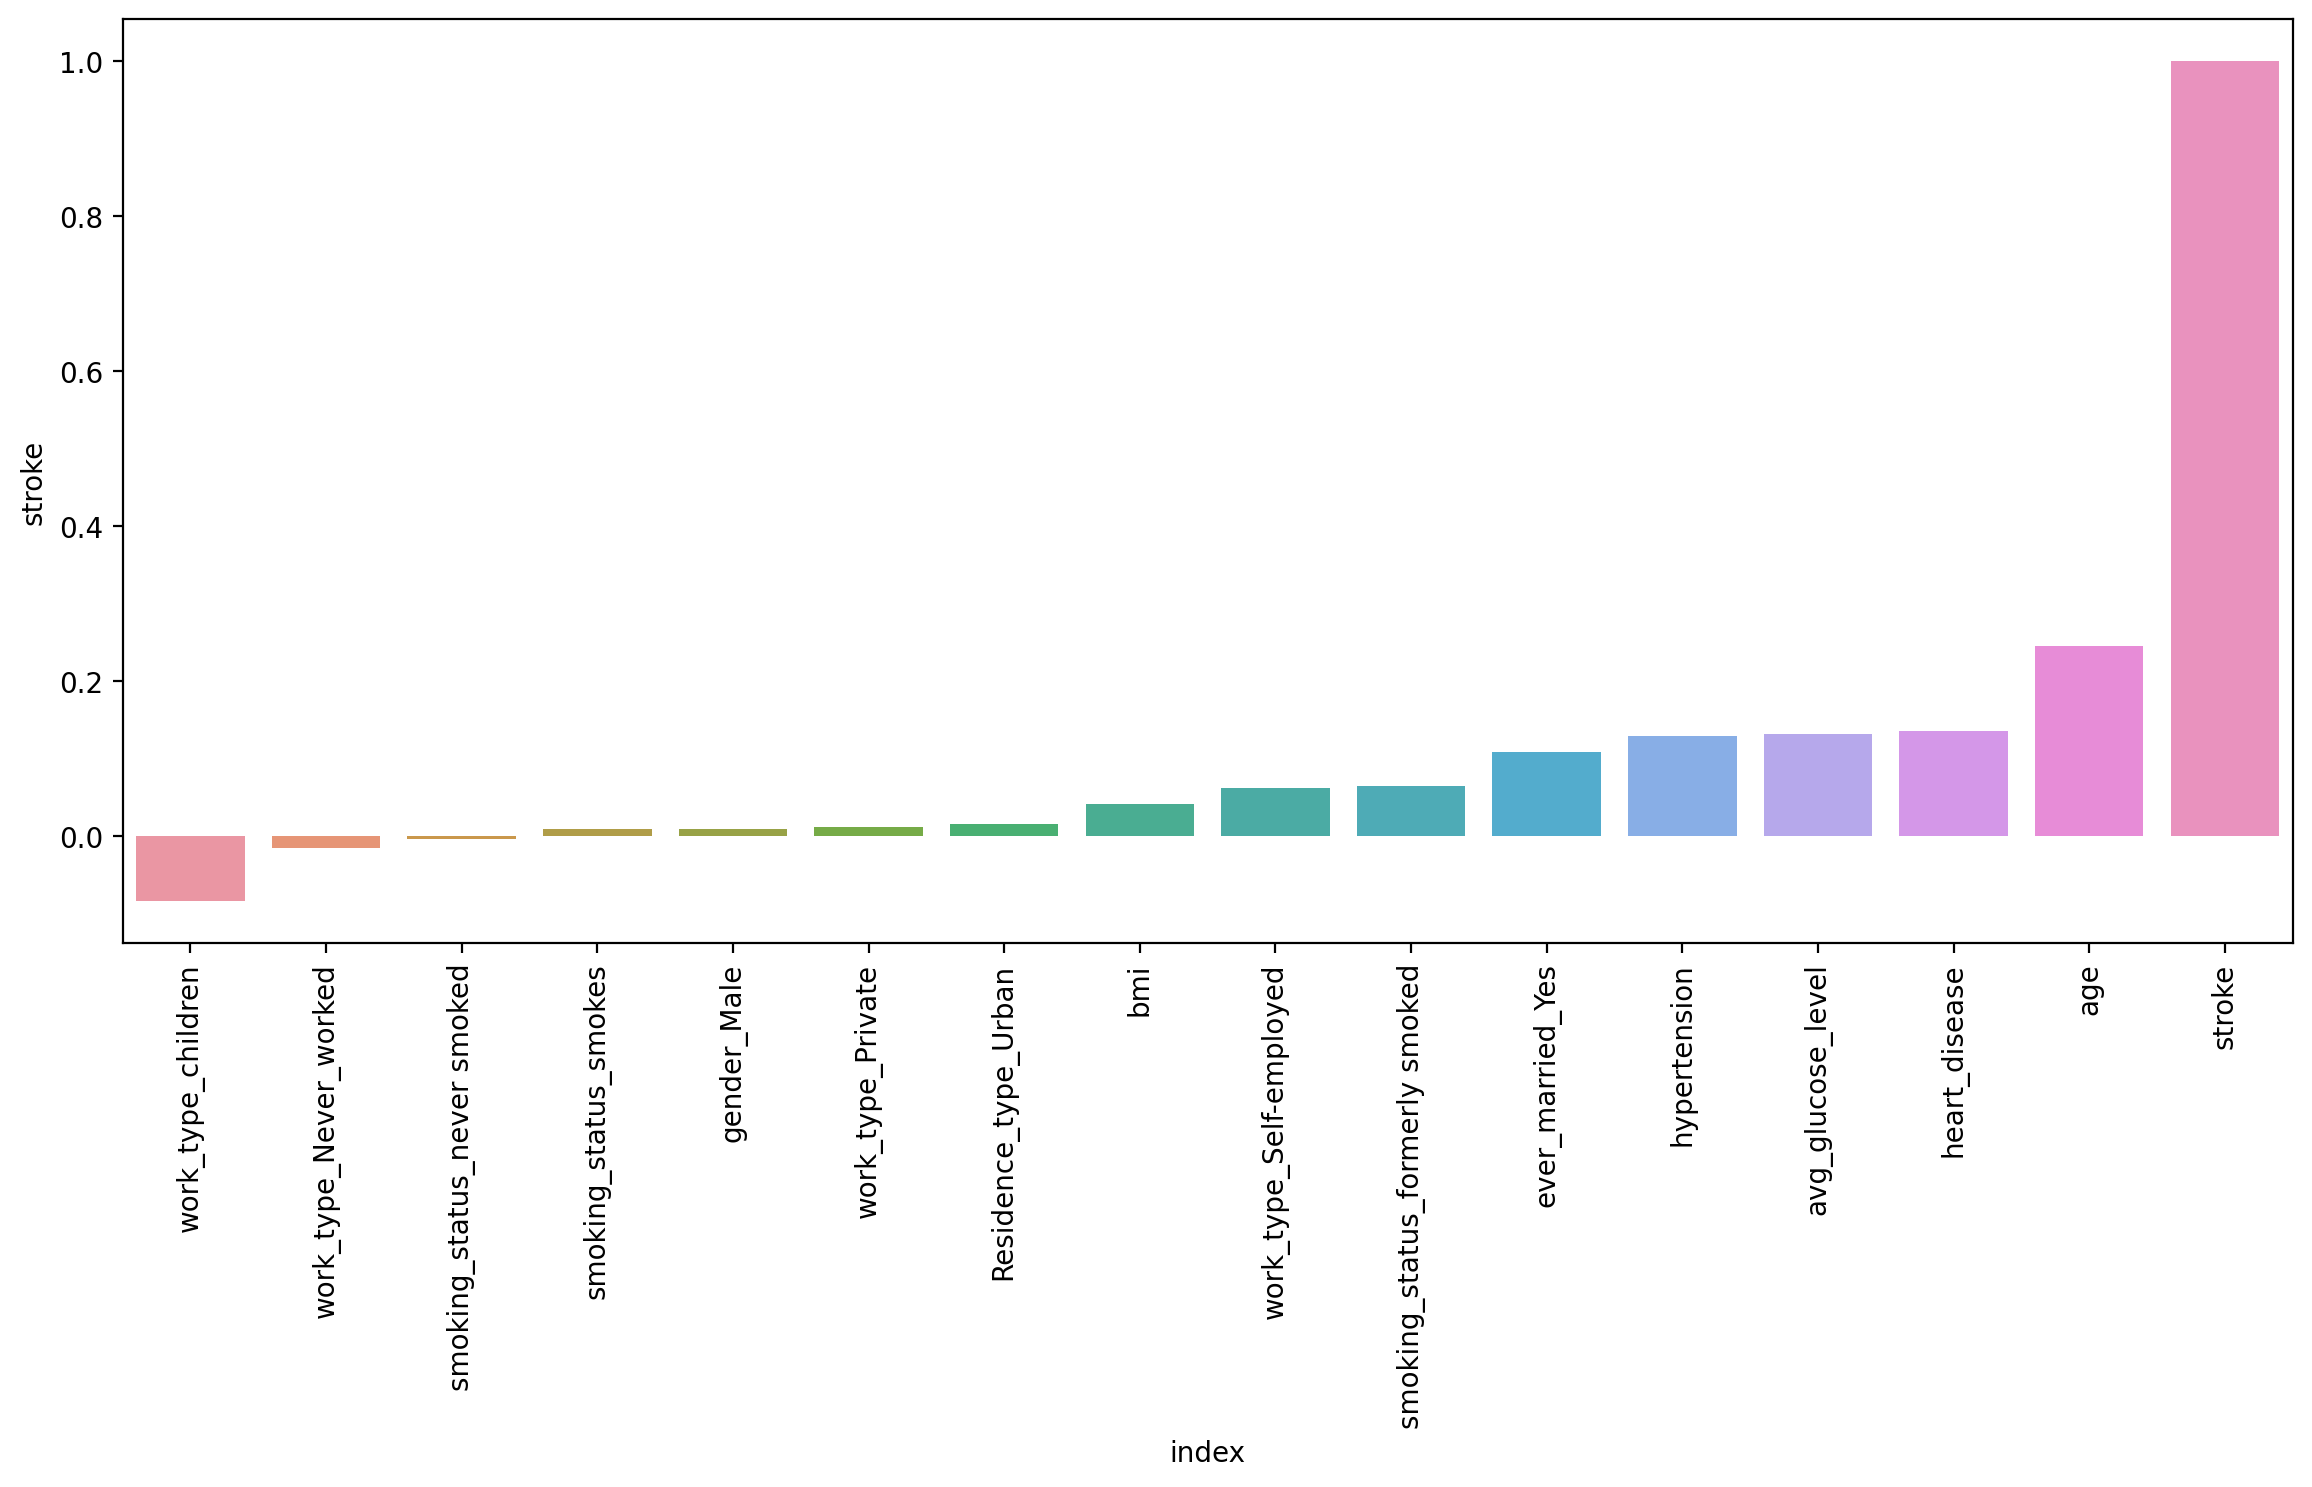

In [165]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=corr_wth_stroke.reset_index(),x='index',y='stroke')
plt.xticks(rotation=90);

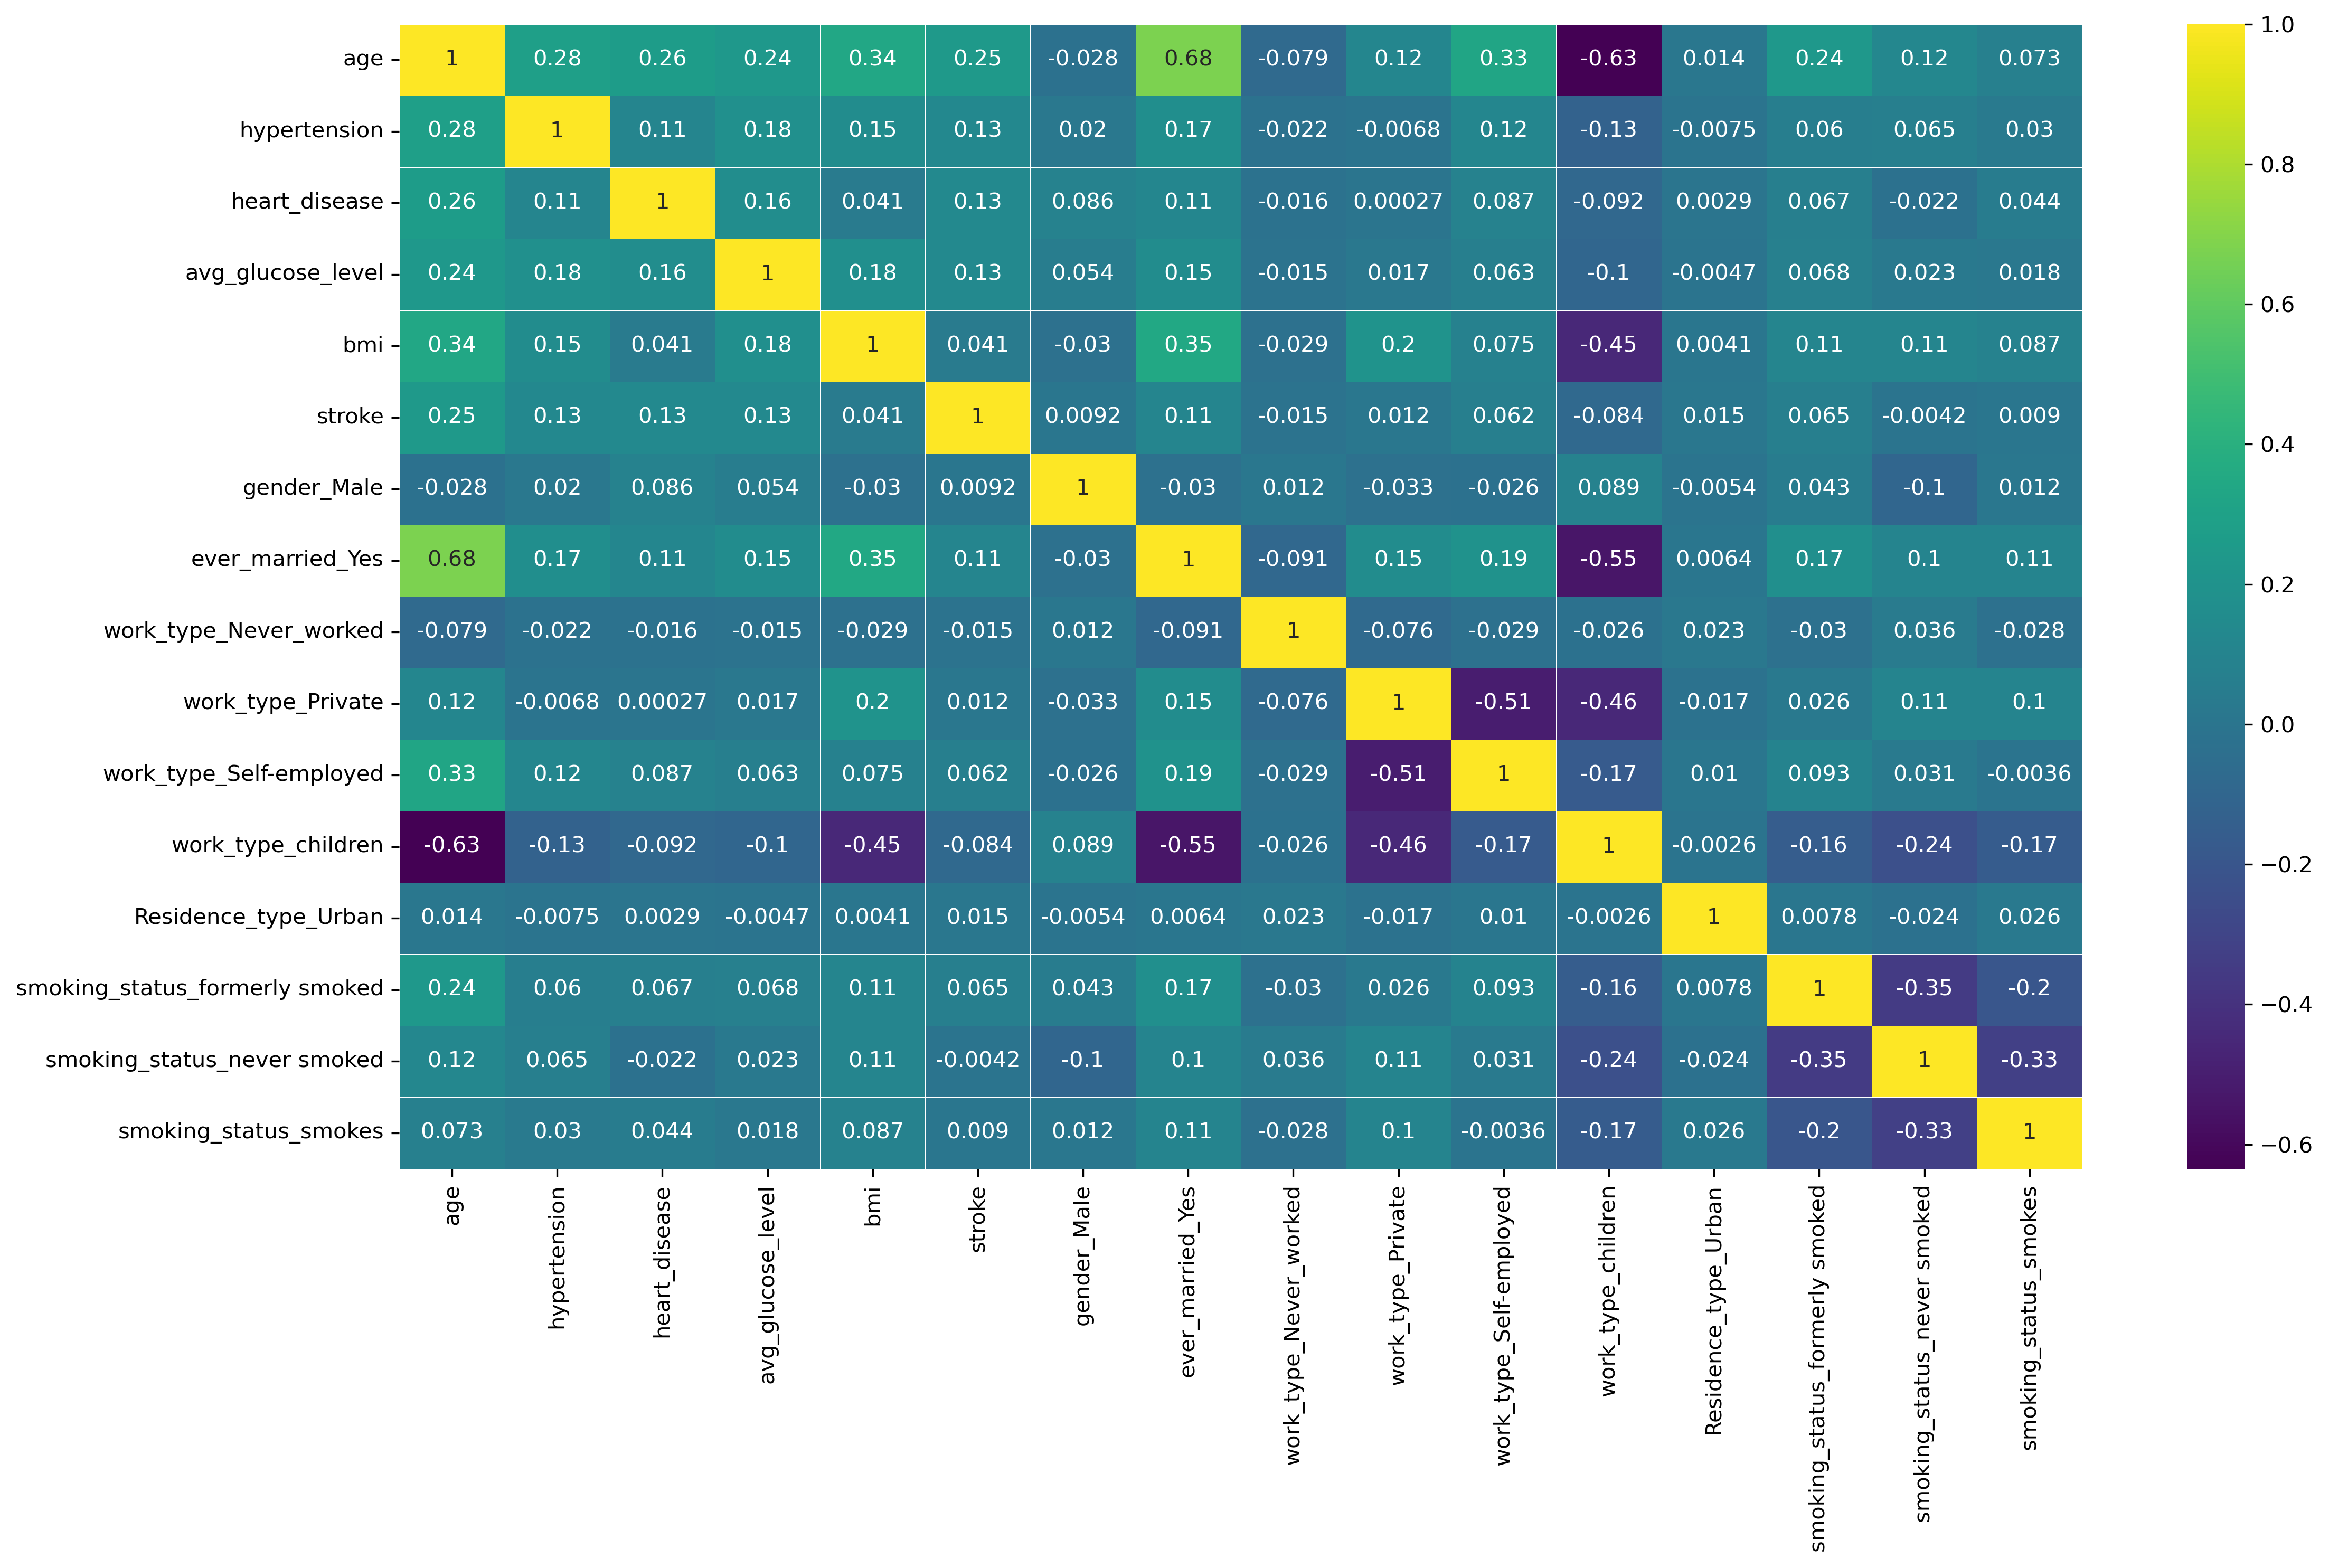

In [166]:
plt.figure(figsize=(16,10),dpi=300)
sns.heatmap(df.corr(),lw=0.2,annot=True,cmap='viridis')
plt.tight_layout()

**Insight**

   - *work_type_children has strong Negative correlation with stroke.*
   - *age has strong Postive correlation with stroke.*
   - *stroke has no such correlation with smoking_status_never_smoked.*
   - *age and ever_married highly correlated.*

### Data Preproccessing

**Split data into input features and target**

In [167]:
df.shape

(5104, 16)

In [168]:
df

age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0     67.0             0              1             228.69  36.600000       1   
1     61.0             0              0             202.21  28.893237       1   
2     80.0             0              1             105.92  32.500000       1   
3     49.0             0              0             171.23  34.400000       1   
4     79.0             1              0             174.12  24.000000       1   
...    ...           ...            ...                ...        ...     ...   
5105  80.0             1              0              83.75  28.893237       0   
5106  81.0             0              0             125.20  40.000000       0   
5107  35.0             0              0              82.99  30.600000       0   
5108  51.0             0              0             166.29  25.600000       0   
5109  44.0             0              0              85.28  26.200000       0   

      gender_Male  ever_married_Yes  work_type_Never_worked  \
0               1                 1                       0   
1               0                 1                       0   
2               1                 1                       0   
3               0                 1                       0   
4               0                 1                       0   
...           ...               ...                     ...   
5105            0                 1                       0   
5106            0                 1                       0   
5107            0                 1                       0   
5108            1                 1                       0   
5109            0                 1                       0   

      work_type_Private  work_type_Self-employed  work_type_children  \
0                     1                        0                   0   
1                     0                        1                   0   
2                     1                        0                   0   
3                     1                        0                   0   
4                     0                        1                   0   
...                 ...                      ...                 ...   
5105                  1                        0                   0   
5106                  0                        1                   0   
5107                  0                        1                   0   
5108                  1                        0                   0   
5109                  0                        0                   0   

      Residence_type_Urban  smoking_status_formerly smoked  \
0                        1                               1   
1                        0                               0   
2                        0                               0   
3                        1                               0   
4                        0                               0   
...                    ...                             ...   
5105                     1                               0   
5106                     1                               0   
5107                     0                               0   
5108                     0                               1   
5109                     1                               0   

      smoking_status_never smoked  smoking_status_smokes  
0                               0                      0  
1                               1                      0  
2                               1                      0  
3                               0                      1  
4                               1                      0  
...                           ...                    ...  
5105                            1                      0  
5106                            1                      0  
5107                            1                      0  
5108                            0                      0  
5109              

In [169]:
sample = df[(df.index==4) | (df.index==241) | (df.index==345) | (df.index==4321)]
sample
df = df.drop(sample.index)

In [170]:
X = df.drop('stroke',axis=1)
y = df['stroke']

In [171]:
print(f'X_values : {X.shape[0]}\n\ny_values :\n\n{y.value_counts()}')

X_values : 5100

y_values :

0    4853
1     247
Name: stroke, dtype: int64


**Resample X and y**

In [172]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a 
# over sampling method to have equal representation of both the target classes.
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resampling
X_resampled, y_resampled = ros.fit_resample(X, y)

*Since RandomOverSampler is not performed good enough it coused wrong prediction even has high accuracy,so it's better to use SMOTE*

In [173]:
print(f'X_values : {X_resampled.shape[0]}\n\ny_values :\n\n{y_resampled.value_counts()}')

X_values : 9706

y_values :

1    4853
0    4853
Name: stroke, dtype: int64


**Split data into training & testing sets**

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**Feature Scaling**

In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
con_column = ['age','avg_glucose_level','bmi']

In [177]:
# Creating an instance
scaler = StandardScaler()

In [178]:
# X_train[con_column] = scaler.fit_transform(X_train[con_column])
# X_test[con_column] = scaler.transform(X_test[con_column])

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# scaled_X_train = X_train
# scaled_X_test = X_test

## Model Training, Testing and Hyperparameter tunning

### **Logistic Regression**

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [180]:
log_model = LogisticRegression(solver='saga')

In [181]:
# Penalty Type
penalty = ['elasticnet']
l1_ratio = [0.1,0.5]
# Using logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 100, 50)
param_grid_log={'C':C,'penalty':penalty,'l1_ratio':l1_ratio}

In [182]:
log_classifier = GridSearchCV(log_model,param_grid_log,cv=5,n_jobs=4)

In [183]:
log_classifier.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'), n_jobs=4,
             param_grid={'C': array([1.00000000e+000, 1.09854114e+002, 1.20679264e+004, 1.32571137e+006,
       1.45634848e+008, 1.59985872e+010, 1.75751062e+012, 1.93069773e+014,
       2.12095089e+016, 2.32995181e+018, 2.55954792e+020, 2.81176870e+022,
       3.08884360e+024, 3.39322177e+026, 3.72759372e+028, 4.09491506e+030,...
       1.38949549e+057, 1.52641797e+059, 1.67683294e+061, 1.84206997e+063,
       2.02358965e+065, 2.22299648e+067, 2.44205309e+069, 2.68269580e+071,
       2.94705170e+073, 3.23745754e+075, 3.55648031e+077, 3.90693994e+079,
       4.29193426e+081, 4.71486636e+083, 5.17947468e+085, 5.68986603e+087,
       6.25055193e+089, 6.86648845e+091, 7.54312006e+093, 8.28642773e+095,
       9.10298178e+097, 1.00000000e+100]),
                         'l1_ratio': [0.1, 0.5], 'penalty': ['elasticnet']})

In [184]:
log_classifier.best_params_

{'C': 1.0, 'l1_ratio': 0.5, 'penalty': 'elasticnet'}

**Model Performance on Classification Tasks**

In [185]:
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

In [186]:
# Accuracy on training set
X_train_predictions = log_classifier.predict(scaled_X_train)
training_data_accuracy = accuracy_score(X_train_predictions,y_train) 
print('Accuracy Score of the Training Data is :',training_data_accuracy)

Accuracy Score of the Training Data is : 0.7758887171561051


In [187]:
# making prediction on test set
y_pred = log_classifier.predict(scaled_X_test)

Accuracy Score : 0.9685890834191555
Classification Report-
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       987
           1       0.94      1.00      0.97       955

    accuracy                           0.97      1942
   macro avg       0.97      0.97      0.97      1942
weighted avg       0.97      0.97      0.97      1942



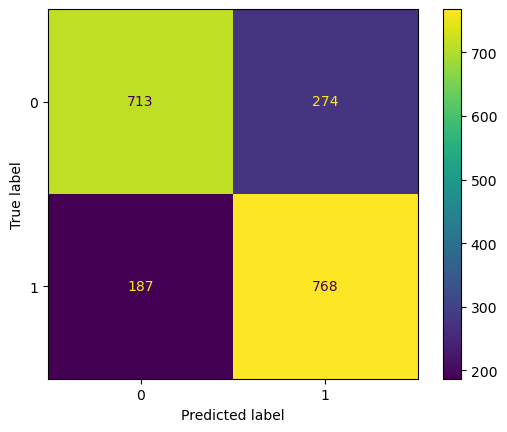

In [281]:
print(f'Accuracy Score : {accuracy_score(y_test,y_pred)}\nClassification Report-\n{classification_report(y_test,y_pred)}')
plot_confusion_matrix(log_classifier,scaled_X_test,y_test);
# plt.savefig('log_con.png', dpi=300, bbox_inches='tight')

### **KNN**

In [189]:
from sklearn.neighbors import KNeighborsClassifier

In [301]:
n_neibors=list(range(3,12))
weights=['uniform','distance']
param_grids = {'n_neighbors':n_neibors,
              'weights':weights}

In [302]:
knn = KNeighborsClassifier()
knn_model=GridSearchCV(knn,param_grids)

In [303]:
knn_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'weights': ['uniform', 'distance']})

In [308]:
knn_model.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

**Model Performance on Classification Tasks**

In [309]:
# Accuracy on training set
X_train_prediction = knn_model.predict(scaled_X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train) 
print('Accuracy Score of the Training Data is :',training_data_accuracy)

Accuracy Score of the Training Data is : 1.0


In [310]:
predictions = knn_model.predict(scaled_X_test)

Accuracy Score : 0.9531410916580845
Classification Report-
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       987
           1       0.91      1.00      0.95       955

    accuracy                           0.95      1942
   macro avg       0.96      0.95      0.95      1942
weighted avg       0.96      0.95      0.95      1942



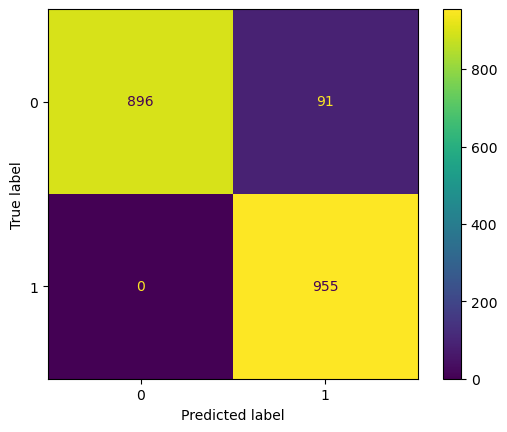

In [312]:
print(f'Accuracy Score : {accuracy_score(y_test,predictions)}\nClassification Report-\n{classification_report(y_test,predictions)}')
plot_confusion_matrix(knn_model,scaled_X_test,y_test);

In [197]:
prediction = knn_model.predict(scaler.transform(sample.drop('stroke',axis=1)))
print(prediction)
for i in range(sample.shape[0]):
    if prediction[i] == 0:
        print('The Patient does not have chance to get Brain Stroke')
    else:
        print('According to provided data Petient will face Brain Stroke')

[1 0 0 0]
According to provided data Petient will face Brain Stroke
The Patient does not have chance to get Brain Stroke
The Patient does not have chance to get Brain Stroke
The Patient does not have chance to get Brain Stroke


### **SVM**

In [198]:
from sklearn.svm import SVC
svm = SVC()

In [199]:
param_grid = {'C':[0.1,1,10,100],'gamma' : [0.1,1,10,100]}
svm_model = GridSearchCV(svm,param_grid,cv=5,n_jobs=3)

In [200]:
svm_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=3,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]})

In [201]:
print(f"Best Parameters :\n{svm_model.best_params_}")

Best Parameters :
{'C': 1, 'gamma': 100}


**Model Performance on Classification Tasks**

In [202]:
# Accuracy on training set
X_train_prediction = svm_model.predict(scaled_X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train) 
print('Accuracy Score of the Training Data is :',training_data_accuracy)

Accuracy Score of the Training Data is : 1.0


In [203]:
# # making prediction on test set
y_preds = svm_model.predict(scaled_X_test)

Accuracy Score : 0.9989701338825953
Classification Report-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       987
           1       1.00      1.00      1.00       955

    accuracy                           1.00      1942
   macro avg       1.00      1.00      1.00      1942
weighted avg       1.00      1.00      1.00      1942



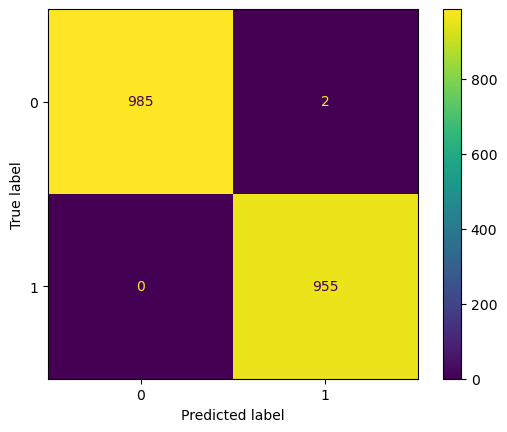

In [313]:
print(f'Accuracy Score : {accuracy_score(y_test,y_preds)}\nClassification Report-\n{classification_report(y_test,y_preds)}')
plot_confusion_matrix(svm_model,scaled_X_test,y_test);

### Random Forest Classifier

In [205]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
n_estimators=[100,128]
max_features= [10,16]

In [207]:
param_grids = {'n_estimators':n_estimators,
              'max_features':max_features}

In [208]:
rfc = RandomForestClassifier(random_state=42)
rfc_model = GridSearchCV(rfc,param_grids)

In [209]:
rfc_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': [10, 16], 'n_estimators': [100, 128]})

In [210]:
rfc_model.best_params_

{'max_features': 10, 'n_estimators': 100}

**Model Performance on Classification Tasks**

In [211]:
# Accuracy on training set
X_train_prediction = rfc_model.predict(scaled_X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train) 
print('Accuracy Score of the Training Data is :',training_data_accuracy)

Accuracy Score of the Training Data is : 1.0


In [212]:
predictions = rfc_model.predict(scaled_X_test)

Accuracy Score : 0.9531410916580845
Classification Report-
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       987
           1       0.91      1.00      0.95       955

    accuracy                           0.95      1942
   macro avg       0.96      0.95      0.95      1942
weighted avg       0.96      0.95      0.95      1942



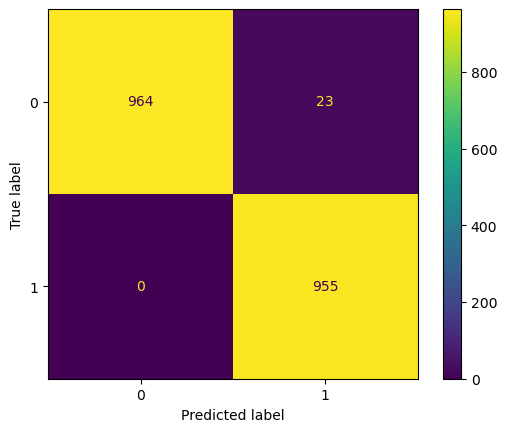

In [314]:
print(f'Accuracy Score : {accuracy_score(y_test,predictions)}\nClassification Report-\n{classification_report(y_test,predictions)}')
plot_confusion_matrix(rfc_model,scaled_X_test,y_test);

### Drawing Curves

**Logistic Regression**

In [214]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve


                              ROC Curve for Logistic Regression


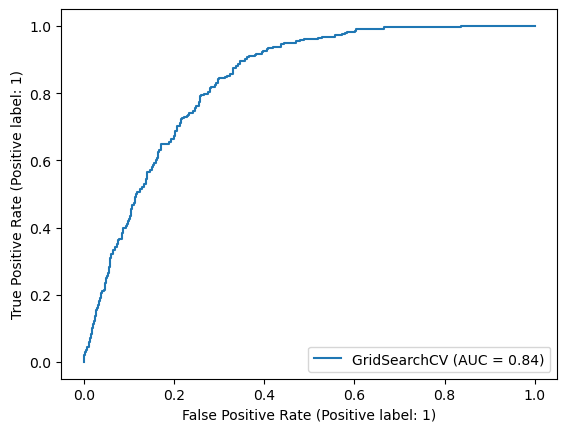

In [322]:
print("\n                              ROC Curve for Logistic Regression")
plot_roc_curve(log_classifier,scaled_X_test,y_test);

**KNN**


                              ROC Curve for KNN


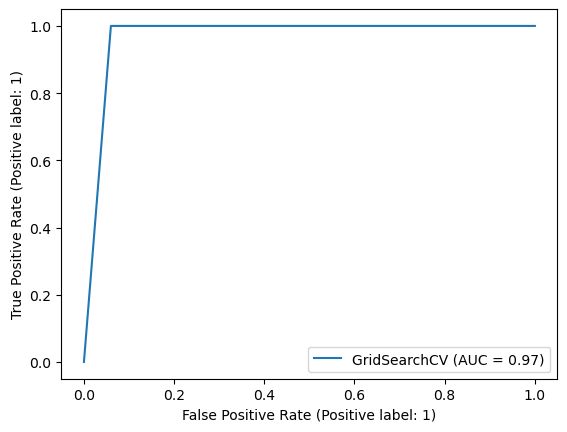

In [323]:
print("\n                              ROC Curve for KNN")
plot_roc_curve(knn_model,scaled_X_test,y_test);

**SVM**


                              ROC Curve for SVM


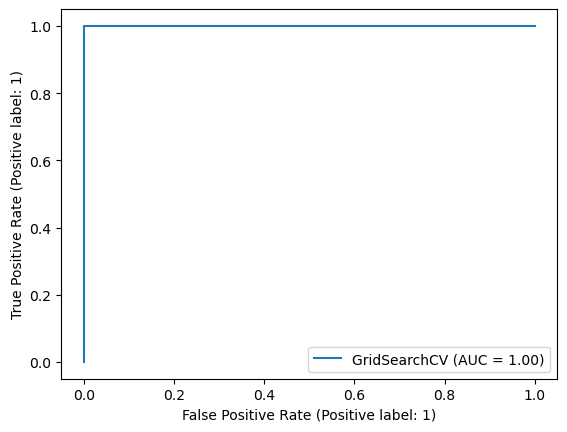

In [324]:
print("\n                              ROC Curve for SVM")
plot_roc_curve(svm_model,scaled_X_test,y_test);

**Random Forest Classifier**


                              ROC Curve for Random Forest


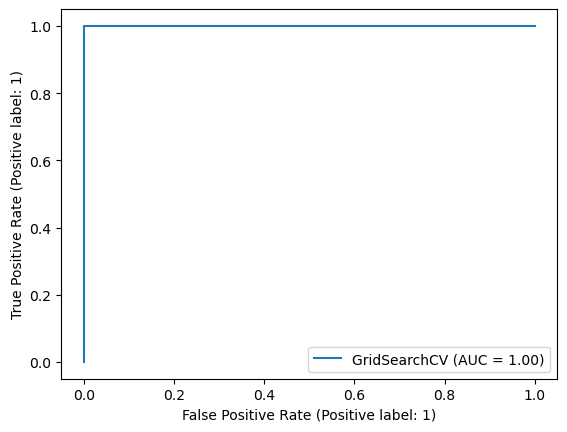

In [325]:
print("\n                              ROC Curve for Random Forest")
plot_roc_curve(rfc_model,scaled_X_test,y_test);

### Artificial Neural Networks - ANN

In [269]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [282]:
ann=Sequential()
ann.add(Dense(32,activation='swish'))
ann.add(Dropout(0.25))
ann.add(Dense(32,activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(24,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))
adam=Adam(learning_rate=0.01)
ann.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [283]:
result = ann.fit(scaled_X_train,y_train,epochs=500,validation_split=0.2)
result

Epoch 1/500
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7264 - loss: 0.5385 - val_accuracy: 0.7836 - val_loss: 0.4614
Epoch 2/500
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7803 - loss: 0.4622 - val_accuracy: 0.7843 - val_loss: 0.4704
Epoch 3/500
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7798 - loss: 0.4593 - val_accuracy: 0.7894 - val_loss: 0.4403
Epoch 4/500
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8009 - loss: 0.4220 - val_accuracy: 0.7997 - val_loss: 0.4220
Epoch 5/500
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7996 - loss: 0.4215 - val_accuracy: 0.8229 - val_loss: 0.3955
Epoch 6/500
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8000 - loss: 0.4187 - val_accuracy: 0.8113 - val_loss: 0.4070
Epoch 7/500
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8030 - loss: 0.4103 - val_accuracy: 0.8184 - val_loss: 0.3996
Epoch 8/500
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8157 - loss: 0.4025 - val_accu

**Model Performance on Classification Tasks**

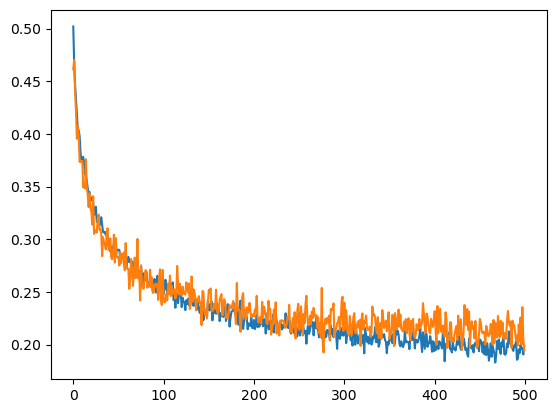

In [284]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

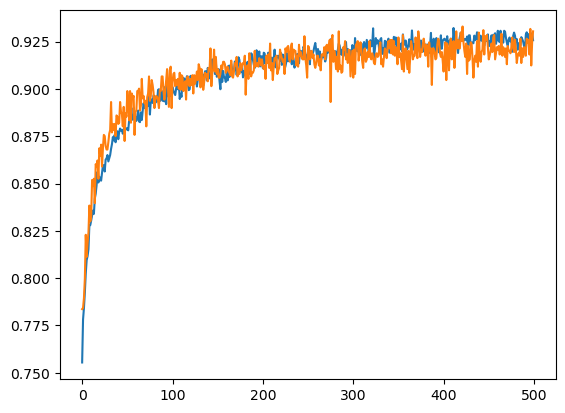

In [285]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


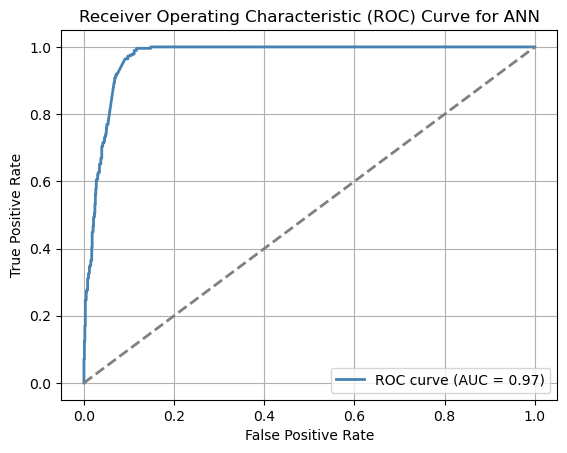

In [337]:
y_pred_proba = ann.predict(scaled_X_test)
# print("\n                              ROC Curve for ANN")
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='steelblue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ANN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [315]:
from sklearn.metrics import confusion_matrix
y_pred=[]
for i in ann.predict(scaled_X_test):
    if i>=0.5:
        y_pred.append(1)
    if i<0.5:
        y_pred.append(0)
print(confusion_matrix(y_test,y_pred))
accuracy=accuracy_score(y_test,y_pred)
print("\nANN Acuracy on test data :",round(accuracy,2),"\n\n",classification_report(y_test,y_pred))

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[872 115]
 [  4 951]]

ANN Acuracy on test data : 0.94 

               precision    recall  f1-score   support

           0       1.00      0.88      0.94       987
           1       0.89      1.00      0.94       955

    accuracy                           0.94      1942
   macro avg       0.94      0.94      0.94      1942
weighted avg       0.94      0.94      0.94      1942



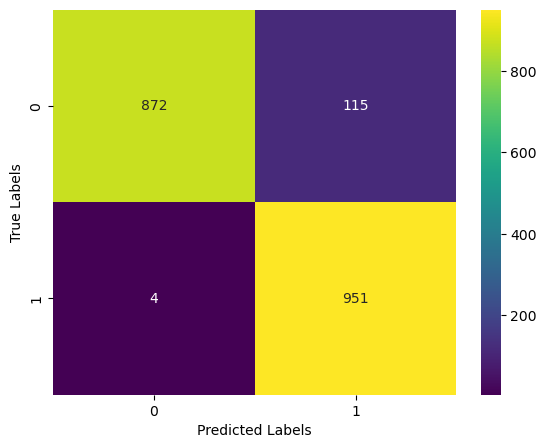

<Figure size 640x480 with 0 Axes>

In [316]:
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6.5,5))
sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt="d", annot_kws={"size": 10})
plt.xlabel('Predicted Labels', fontsize=10)
plt.ylabel('True Labels', fontsize=10)
plt.show()

### Prediction of All Algorithms on unseen sample Data

In [276]:
sample

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
4     79.0             1              0             174.12  24.0       1   
241   57.0             0              0             197.28  34.5       1   
345   23.0             0              0              99.92  25.8       0   
4321  65.0             0              0             179.67  30.7       0   

      gender_Male  ever_married_Yes  work_type_Never_worked  \
4               0                 1                       0   
241             1                 1                       0   
345             0                 0                       0   
4321            1                 1                       0   

      work_type_Private  work_type_Self-employed  work_type_children  \
4                     0                        1                   0   
241                   1                        0                   0   
345                   1                        0                   0   
4321                  0                        1                   0   

      Residence_type_Urban  smoking_status_formerly smoked  \
4                        0                               0   
241                      0                               1   
345                      1                               0   
4321                     1                               1   

      smoking_status_never smoked  smoking_status_smokes  
4                               1                      0  
241                             0                      0  
345                             1                      0  
4321                            0                      0

In [288]:
# Creating an Algorithm which consider all classifiers output and predict

models = [log_classifier,knn_model,svm_model,rfc_model,ann]
name = ['Logistic Regression','KNN','SVM','Random Forest','ANN']

for i in range(5):
    print("According to",name[i],"classifier\n")
    prediction = models[i].predict(scaler.transform(sample.drop('stroke',axis=1)))
    print(prediction)
    if(models[i]==ann):
        for i in range(sample.shape[0]):
            if prediction[i]<0.5:
                print('According to provided data Petient does not have chance to get Brain Stroke')
            else:
                print('According to provided data Petient will have chance to get Brain Stroke')
    else:    
        for i in range(sample.shape[0]):
            if prediction[i] == 0:
                print('According to provided data Petient does not have chance to get Brain Stroke')
            else:
                print('According to provided data Petient will have chance to get Brain Stroke')
    print("\n\n")

According to Logistic Regression classifier

[1 1 0 1]
According to provided data Petient will have chance to get Brain Stroke
According to provided data Petient will have chance to get Brain Stroke
According to provided data Petient does not have chance to get Brain Stroke
According to provided data Petient will have chance to get Brain Stroke



According to KNN classifier

[1 0 0 0]
According to provided data Petient will have chance to get Brain Stroke
According to provided data Petient does not have chance to get Brain Stroke
According to provided data Petient does not have chance to get Brain Stroke
According to provided data Petient does not have chance to get Brain Stroke



According to SVM classifier

[0 0 0 0]
According to provided data Petient does not have chance to get Brain Stroke
According to provided data Petient does not have chance to get Brain Stroke
According to provided data Petient does not have chance to get Brain Stroke
According to provided data Petient does n

In [226]:
# from tensorflow import keras
# from tensorflow.keras import layers
# def create_model(activation_function):
#     model = keras.Sequential([
#         layers.Dense(32, activation=activation_function),
#         layers.Dense(25, activation=activation_function),
#         layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
#     ])
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# # List of activation functions to try
# activation_functions = ['relu', 'sigmoid', 'tanh', 'softmax', 'softplus', 'softsign',
#                          'selu', 'elu', 'exponential', 'linear', 'swish', 'leaky_relu']

# # Experiment with different activation functions
# for activation_function in activation_functions:
#     model = create_model(activation_function)
#     model.fit(scaled_X_train, y_train, epochs=50, validation_split=0.2)
#     y_pred = (model.predict(X_test) > 0.5).astype("int32")
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Activation Function: {activation_function}, Accuracy: {accuracy:.2f}")


### Hybrid Algorithm
**Logistic Regression, KNN, SVM, Random Forest, ANN**

In [338]:
def vot_classifier(X,classifier):
    y_pred=[]
    for i in range(5):
        pred=[]
        for i in classifier[i].predict(X):
            if i>=0.5:
                pred.append(1)
            if i<0.5:
                pred.append(0)
        y_pred.append(pred)
        
    final_pred=[]
    for i in range(X.shape[0]):
        l=[y_pred[0][i],y_pred[1][i],y_pred[2][i],y_pred[3][i],y_pred[4][i]]
        ones_cnt=l.count(1)
        if(ones_cnt>=3):
            final_pred.append(1)
        else:
            final_pred.append(0)
    return final_pred


In [339]:
classifiers=[log_classifier,knn_model,svm_model,rfc_model,ann]
y_pred = vot_classifier(scaled_X_test,classifiers)
y_pred

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,


[[936  51]
 [  0 955]]
Accuracy Score : 0.9737384140061792
Classification Report-
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       987
           1       0.95      1.00      0.97       955

    accuracy                           0.97      1942
   macro avg       0.97      0.97      0.97      1942
weighted avg       0.98      0.97      0.97      1942



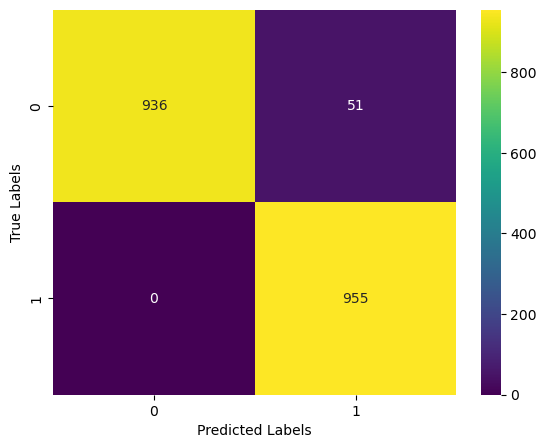

In [291]:
print(confusion_matrix(y_test,y_pred))
print(f'Accuracy Score : {accuracy_score(y_test,y_pred)}\nClassification Report-\n{classification_report(y_test,y_pred)}')
conf_matrixx=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6.5,5))
sns.heatmap(conf_matrixx, annot=True, cmap="viridis", fmt="d", annot_kws={"size": 10})
plt.xlabel('Predicted Labels', fontsize=10)
plt.ylabel('True Labels', fontsize=10)
plt.show()

In [340]:
test_data = sample[(sample.index==4) | (sample.index==345)]
test_data

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
4    79.0             1              0             174.12  24.0       1   
345  23.0             0              0              99.92  25.8       0   

     gender_Male  ever_married_Yes  work_type_Never_worked  work_type_Private  \
4              0                 1                       0                  0   
345            0                 0                       0                  1   

     work_type_Self-employed  work_type_children  Residence_type_Urban  \
4                          1                   0                     0   
345                        0                   0                     1   

     smoking_status_formerly smoked  smoking_status_never smoked  \
4                                 0                            1   
345                               0                            1   

     smoking_status_smokes  
4                        0  
345                      0

In [293]:
def prediction(y):
    for i in range(len(y)):
        if(y[i]==0):
           print('According to provided data Patient does not have chance to get Brain Stroke.') 
        else:
            print('According to provided data Petient will have chance to get Brain Stroke.')
        

In [294]:
predictions=vot_classifier(scaler.transform(test_data.drop('stroke',axis=1)),classifiers)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[1, 0]


In [295]:
prediction(predictions)

According to provided data Petient will have chance to get Brain Stroke.
According to provided data Patient does not have chance to get Brain Stroke.


## Class of Voting Classfier

In [ ]:
class vot_classifier:
    def __init__(self):
        pass

    # taking list of applied classifiers using function classifiers
    def classifiers(self,classifiers):
        self.classifier=classifiers

    # define function predict which takes argument x(input data for prediction)
    def predict(self,x):
        self.x = pd.get_dummies(x,drop_first=True)
        self.x=scaler.transform(self.x) #scaling data by using same used scaling technique
        self.y_pred=[]
        for i in range(5):
            self.pred=[]
            for i in self.classifier[i].predict(self.x):
                if i>=0.5:
                    self.pred.append(1)
                if i<0.5:
                    self.pred.append(0)
            self.y_pred.append(self.pred)

        self.final_pred=[]

        # predicting output from each model and finding highest number of occurence for output
        for i in range(self.x.shape[0]):
            self.l=[self.y_pred[0][i],self.y_pred[1][i],self.y_pred[2][i],self.y_pred[3][i],self.y_pred[4][i]]
            self.ones_cnt=self.l.count(1)
            if(self.ones_cnt>2):
                self.final_pred.append(1)
            else:
                self.final_pred.append(0)
        self.prediction(self.final_pred)

    # customizing output display
    def prediction(self,y):
        self.y=y
        print(self.y)
        for i in range(len(self.y)):
            if(self.y[i]==0):
               print('According to provided data Patient does not have chance to get Brain Stroke.')
            else:
                print('According to provided data Patient will have chance to get Brain Stroke.')

In [ ]:
vc = vot_classifier()
vc.classifiers(classifiers)
vc.predict(test_data.drop('stroke',axis=1))